<a href="https://colab.research.google.com/github/mitwnkl/coffee_classification/blob/main/coffee_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project #1

Theme: Origin of a coffee bean  
Task type: classification  
author: Aleinikov O.V.

In this notebook, I will try to classify the country of origin of coffee beans based on the characteristics of the drink from experts.

Datasets:  
1. https://www.kaggle.com/datasets/volpatto/coffee-quality-database-from-cqi  
2. https://www.kaggle.com/datasets/fatihb/coffee-quality-data-cqi  
3. https://www.kaggle.com/datasets/j4ckdev/green-coffee-beans-dataset (1 from archive)

In [2]:
# data processing and visualization packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_csv("https://raw.githubusercontent.com/mitwnkl/coffee_classification/main/coffee_beans_1.csv", index_col="ID")
df2 = pd.read_csv("https://raw.githubusercontent.com/mitwnkl/coffee_classification/main/coffee_beans_2.csv", index_col="ID")
df3 = pd.read_csv("https://raw.githubusercontent.com/mitwnkl/coffee_classification/main/coffee_beans_3.csv", index_col=0)

print(df1.info())
df1.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 0 to 206
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             207 non-null    int64  
 1   Country of Origin      207 non-null    object 
 2   Farm Name              205 non-null    object 
 3   Lot Number             206 non-null    object 
 4   Mill                   204 non-null    object 
 5   ICO Number             75 non-null     object 
 6   Company                207 non-null    object 
 7   Altitude               206 non-null    object 
 8   Region                 205 non-null    object 
 9   Producer               206 non-null    object 
 10  Number of Bags         207 non-null    int64  
 11  Bag Weight             207 non-null    object 
 12  In-Country Partner     207 non-null    object 
 13  Harvest Year           207 non-null    object 
 14  Grading Date           207 non-null    object 
 15  Owner 

Unnamed: 0 Country of Origin                 Farm Name  \
ID                                                           
0            0          Colombia          Finca El Paraiso   
1            1            Taiwan  Royal Bean Geisha Estate   
2            2              Laos        OKLAO coffee farms   
3            3        Costa Rica                 La Cumbre   
4            4          Colombia           Finca Santuario   

                                 Lot Number                           Mill  \
ID                                                                           
0                                CQU2022015               Finca El Paraiso   
1   The 2022 Pacific Rim Coffee Summit,T037       Royal Bean Geisha Estate   
2   The 2022 Pacific Rim Coffee Summit,LA01  oklao coffee processing plant   
3                                CQU2022017        La Montana Tarrazu MIll   
4                                CQU2023002                Finca Santuario   

   ICO Number                   Company   Altitude                Region  \
ID                                                                         
0         NaN      Coffee Quality Union  1700-1930        Piendamo,Cauca   
1         NaN  Taiwan Coffee Laboratory       1200                Chiayi   
2         NaN  Taiwan Coffee Laboratory       1300  Laos Borofen Plateau   
3         NaN      Coffee Quality Union       1900    Los Santos,Tarrazu   
4         NaN      Coffee Quality Union  1850-2100         Popayan,Cauca   

                 Producer  ...  Total Cup Points Moisture Percentage  \
ID                         ...                                         
0   Diego Samuel Bermudez  ...             89.33                11.8   
1                     曾福森  ...             87.58                10.5   
2              WU TAO CHI  ...             87.42                10.4   
3     Santa Maria de Dota  ...             87.17                11.8   
4        Camilo Merizalde  ...             87.08                11.6   

   Category One Defects Quakers         Color Category Two Defects  \
ID                                                                   
0                     0       0         green                    3   
1                     0       0    blue-green                    0   
2                     0       0     yellowish                    2   
3                     0       0         green                    0   
4                     0       2  yellow-green                    2   

              Expiration                Certification Body  \
ID                                                           
0   September 21st, 2023             Japan Coffee Exchange   
1    November 15th, 2023  Taiwan Coffee Laboratory 台灣咖啡研究室   
2    November 15th, 2023  Taiwan Coffee Laboratory 台灣咖啡研究室   
3   September 21st, 2023             Japan Coffee Exchange   
4        March 5th, 2024             Japan Coffee Exchange   

                                Certification Address  \
ID                                                      
0   〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...   
1   QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...   
2   QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...   
3   〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...   
4   〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...   

                      Certification Contact  
ID                                           
0   松澤　宏樹　Koju Matsuzawa - +81(0)9085642901  
1      Lin, Jen-An Neil 林仁安 - 886-289116612  
2      Lin, Jen-An Neil 林仁安 - 886-289116612  
3   松澤　宏樹　Koju Matsuzawa - +81(0)9085642901  
4   松澤　宏樹　Koju Matsuzawa - +81(0)9085642901  

[5 rows x 40 columns]

In [4]:
df1 = df1.drop("Unnamed: 0", axis=1)
print(df1.info())
df1.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 0 to 206
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country of Origin      207 non-null    object 
 1   Farm Name              205 non-null    object 
 2   Lot Number             206 non-null    object 
 3   Mill                   204 non-null    object 
 4   ICO Number             75 non-null     object 
 5   Company                207 non-null    object 
 6   Altitude               206 non-null    object 
 7   Region                 205 non-null    object 
 8   Producer               206 non-null    object 
 9   Number of Bags         207 non-null    int64  
 10  Bag Weight             207 non-null    object 
 11  In-Country Partner     207 non-null    object 
 12  Harvest Year           207 non-null    object 
 13  Grading Date           207 non-null    object 
 14  Owner                  207 non-null    object 
 15  Variet

Country of Origin                 Farm Name  \
ID                                               
0           Colombia          Finca El Paraiso   
1             Taiwan  Royal Bean Geisha Estate   
2               Laos        OKLAO coffee farms   
3         Costa Rica                 La Cumbre   
4           Colombia           Finca Santuario   

                                 Lot Number                           Mill  \
ID                                                                           
0                                CQU2022015               Finca El Paraiso   
1   The 2022 Pacific Rim Coffee Summit,T037       Royal Bean Geisha Estate   
2   The 2022 Pacific Rim Coffee Summit,LA01  oklao coffee processing plant   
3                                CQU2022017        La Montana Tarrazu MIll   
4                                CQU2023002                Finca Santuario   

   ICO Number                   Company   Altitude                Region  \
ID                                                                         
0         NaN      Coffee Quality Union  1700-1930        Piendamo,Cauca   
1         NaN  Taiwan Coffee Laboratory       1200                Chiayi   
2         NaN  Taiwan Coffee Laboratory       1300  Laos Borofen Plateau   
3         NaN      Coffee Quality Union       1900    Los Santos,Tarrazu   
4         NaN      Coffee Quality Union  1850-2100         Popayan,Cauca   

                 Producer  Number of Bags  ... Total Cup Points  \
ID                                         ...                    
0   Diego Samuel Bermudez               1  ...            89.33   
1                     曾福森               1  ...            87.58   
2              WU TAO CHI              19  ...            87.42   
3     Santa Maria de Dota               1  ...            87.17   
4        Camilo Merizalde               2  ...            87.08   

   Moisture Percentage Category One Defects Quakers         Color  \
ID                                                                  
0                 11.8                    0       0         green   
1                 10.5                    0       0    blue-green   
2                 10.4                    0       0     yellowish   
3                 11.8                    0       0         green   
4                 11.6                    0       2  yellow-green   

   Category Two Defects            Expiration  \
ID                                              
0                     3  September 21st, 2023   
1                     0   November 15th, 2023   
2                     2   November 15th, 2023   
3                     0  September 21st, 2023   
4                     2       March 5th, 2024   

                  Certification Body  \
ID                                     
0              Japan Coffee Exchange   
1   Taiwan Coffee Laboratory 台灣咖啡研究室   
2   Taiwan Coffee Laboratory 台灣咖啡研究室   
3              Japan Coffee Exchange   
4              Japan Coffee Exchange   

                                Certification Address  \
ID                                                      
0   〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...   
1   QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...   
2   QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...   
3   〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...   
4   〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...   

                      Certification Contact  
ID                                           
0   松澤　宏樹　Koju Matsuzawa - +81(0)9085642901  
1      Lin, Jen-An Neil 林仁安 - 886-289116612  
2      Lin, Jen-An Neil 林仁安 - 886-289116612  
3   松澤　宏樹　Koju Matsuzawa - +81(0)9085642901  
4   松澤　宏樹　Koju Matsuzawa - +81(0)9085642901  

[5 rows x 39 columns]

In [ ]:
print(df2.info())
df2.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1319 entries, 1 to 1312
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Species                1319 non-null   object 
 1   Owner                  1310 non-null   object 
 2   Country.of.Origin      1316 non-null   object 
 3   Farm.Name              961 non-null    object 
 4   Lot.Number             276 non-null    object 
 5   Mill                   1007 non-null   object 
 6   ICO.Number             1169 non-null   object 
 7   Company                1105 non-null   object 
 8   Altitude               1092 non-null   object 
 9   Region                 1257 non-null   object 
 10  Producer               1084 non-null   object 
 11  Number.of.Bags         1314 non-null   object 
 12  Bag.Weight             1314 non-null   object 
 13  In.Country.Partner     1314 non-null   object 
 14  Harvest.Year           1266 non-null   object 
 15  Grading.D

Species                     Owner Country.of.Origin  \
ID                                                        
1   Arabica                 metad plc          Ethiopia   
2   Arabica                 metad plc          Ethiopia   
3   Arabica  grounds for health admin         Guatemala   
4   Arabica       yidnekachew dabessa          Ethiopia   
5   Arabica                 metad plc          Ethiopia   

                                   Farm.Name Lot.Number       Mill ICO.Number  \
ID                                                                              
1                                  metad plc        NaN  metad plc  2014/2015   
2                                  metad plc        NaN  metad plc  2014/2015   
3   san marcos barrancas "san cristobal cuch        NaN        NaN        NaN   
4      yidnekachew dabessa coffee plantation        NaN    wolensu        NaN   
5                                  metad plc        NaN  metad plc  2014/2015   

                                  Company       Altitude        Region  ...  \
ID                                                                      ...   
1       metad agricultural developmet plc      1950-2200  guji-hambela  ...   
2       metad agricultural developmet plc      1950-2200  guji-hambela  ...   
3                                     NaN  1600 - 1800 m           NaN  ...   
4   yidnekachew debessa coffee plantation      1800-2200        oromia  ...   
5       metad agricultural developmet plc      1950-2200  guji-hambela  ...   

    Color Category.Two.Defects        Expiration  \
ID                                                 
1   Green                  0.0   April 3rd, 2016   
2   Green                  1.0   April 3rd, 2016   
3     NaN                  0.0    May 31st, 2011   
4   Green                  2.0  March 25th, 2016   
5   Green                  2.0   April 3rd, 2016   

                    Certification.Body  \
ID                                       
1   METAD Agricultural Development plc   
2   METAD Agricultural Development plc   
3         Specialty Coffee Association   
4   METAD Agricultural Development plc   
5   METAD Agricultural Development plc   

                       Certification.Address  \
ID                                             
1   309fcf77415a3661ae83e027f7e5f05dad786e44   
2   309fcf77415a3661ae83e027f7e5f05dad786e44   
3   36d0d00a3724338ba7937c52a378d085f2172daa   
4   309fcf77415a3661ae83e027f7e5f05dad786e44   
5   309fcf77415a3661ae83e027f7e5f05dad786e44   

                       Certification.Contact unit_of_measurement  \
ID                                                                 
1   19fef5a731de2db57d16da10287413f5f99bc2dd                   m   
2   19fef5a731de2db57d16da10287413f5f99bc2dd                   m   
3   0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660                   m   
4   19fef5a731de2db57d16da10287413f5f99bc2dd                   m   
5   19fef5a731de2db57d16da10287413f5f99bc2dd                   m   

   altitude_low_meters altitude_high_meters altitude_mean_meters  
ID                                                                
1               1950.0               2200.0               2075.0  
2               1950.0               2200.0               2075.0  
3               1600.0               1800.0               1700.0  
4               1800.0               2200.0               2000.0  
5               1950.0               2200.0               2075.0  

[5 rows x 43 columns]

In [ ]:
print(df3.info())
df3.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1311 entries, 1 to 1312
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Species                1311 non-null   object 
 1   Owner                  1304 non-null   object 
 2   Country.of.Origin      1310 non-null   object 
 3   Farm.Name              955 non-null    object 
 4   Lot.Number             270 non-null    object 
 5   Mill                   1001 non-null   object 
 6   ICO.Number             1165 non-null   object 
 7   Company                1102 non-null   object 
 8   Altitude               1088 non-null   object 
 9   Region                 1254 non-null   object 
 10  Producer               1081 non-null   object 
 11  Number.of.Bags         1311 non-null   int64  
 12  Bag.Weight             1311 non-null   object 
 13  In.Country.Partner     1311 non-null   object 
 14  Harvest.Year           1264 non-null   object 
 15  Grad

Species                     Owner Country.of.Origin  \
1  Arabica                 metad plc          Ethiopia   
2  Arabica                 metad plc          Ethiopia   
3  Arabica  grounds for health admin         Guatemala   
4  Arabica       yidnekachew dabessa          Ethiopia   
5  Arabica                 metad plc          Ethiopia   

                                  Farm.Name Lot.Number       Mill ICO.Number  \
1                                 metad plc        NaN  metad plc  2014/2015   
2                                 metad plc        NaN  metad plc  2014/2015   
3  san marcos barrancas "san cristobal cuch        NaN        NaN        NaN   
4     yidnekachew dabessa coffee plantation        NaN    wolensu        NaN   
5                                 metad plc        NaN  metad plc  2014/2015   

                                 Company       Altitude        Region  ...  \
1      metad agricultural developmet plc      1950-2200  guji-hambela  ...   
2      metad agricultural developmet plc      1950-2200  guji-hambela  ...   
3                                    NaN  1600 - 1800 m           NaN  ...   
4  yidnekachew debessa coffee plantation      1800-2200        oromia  ...   
5      metad agricultural developmet plc      1950-2200  guji-hambela  ...   

   Color  Category.Two.Defects        Expiration  \
1  Green                     0   April 3rd, 2016   
2  Green                     1   April 3rd, 2016   
3    NaN                     0    May 31st, 2011   
4  Green                     2  March 25th, 2016   
5  Green                     2   April 3rd, 2016   

                   Certification.Body  \
1  METAD Agricultural Development plc   
2  METAD Agricultural Development plc   
3        Specialty Coffee Association   
4  METAD Agricultural Development plc   
5  METAD Agricultural Development plc   

                      Certification.Address  \
1  309fcf77415a3661ae83e027f7e5f05dad786e44   
2  309fcf77415a3661ae83e027f7e5f05dad786e44   
3  36d0d00a3724338ba7937c52a378d085f2172daa   
4  309fcf77415a3661ae83e027f7e5f05dad786e44   
5  309fcf77415a3661ae83e027f7e5f05dad786e44   

                      Certification.Contact unit_of_measurement  \
1  19fef5a731de2db57d16da10287413f5f99bc2dd                   m   
2  19fef5a731de2db57d16da10287413f5f99bc2dd                   m   
3  0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660                   m   
4  19fef5a731de2db57d16da10287413f5f99bc2dd                   m   
5  19fef5a731de2db57d16da10287413f5f99bc2dd                   m   

  altitude_low_meters altitude_high_meters  altitude_mean_meters  
1              1950.0               2200.0                2075.0  
2              1950.0               2200.0                2075.0  
3              1600.0               1800.0                1700.0  
4              1800.0               2200.0                2000.0  
5              1950.0               2200.0                2075.0  

[5 rows x 43 columns]

## Data preprocessing

### Merging dataframes

In [25]:
for df in [df1, df2, df3]:
    print(df.columns)

Index(['Country of Origin', 'Farm Name', 'Lot Number', 'Mill', 'ICO Number',
       'Company', 'Altitude', 'Region', 'Producer', 'Number of Bags',
       'Bag Weight', 'In-Country Partner', 'Harvest Year', 'Grading Date',
       'Owner', 'Variety', 'Status', 'Processing Method', 'Aroma', 'Flavor',
       'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean Cup',
       'Sweetness', 'Overall', 'Defects', 'Total Cup Points',
       'Moisture Percentage', 'Category One Defects', 'Quakers', 'Color',
       'Category Two Defects', 'Expiration', 'Certification Body',
       'Certification Address', 'Certification Contact'],
      dtype='object')
Index(['Species', 'Owner', 'Country.of.Origin', 'Farm.Name', 'Lot.Number',
       'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner', 'Harvest.Year',
       'Grading.Date', 'Owner.1', 'Variety', 'Processing.Method', 'Aroma',
       'Flavor', 'Aftertaste', 'Acidity

Since dataframes have different dimensions, I have to reduce their dimensionality by filtering only features that will be needed in future model.

As the task is to determine the country of origin of coffee beans than the target variable is obviously `Country of Origin`

Now I need to choose and filter features by which the model will determine the country. These features should be directly related to the grain and coffee as a drink from this grain, and not related to any of geographical factors such as the location of the farm, the height of the farm, or coffee distributors

Guided by logic and my barista friend's advice I chose:

* `Aroma` - Refers to the scent or fragrance of the coffee (1.0 to 10.0)
* `Flavor` - The flavor of coffee is evaluated based on the taste, including any sweetness, bitterness, acidity, and other flavor notes. (1.0 to 10.0)
* `Aftertaste` - Refers to the lingering taste that remains in the mouth after swallowing the coffee. (1.0 to 10.0)
* `Acidity` - Acidity in coffee refers to the brightness or liveliness of the taste. (1.0 to 10.0)
* `Body` -  Coffee's texture. A coffee with a full body has a weight, or a fullness, that your mouth perceives when you drink it.
* `Balance` - A balanced coffee will typically be one where sweetness, acidity and bitterness are in balance, and where none of the flavours dominates
* `Uniformity` - Uniformity refers to consistency of flavor of the different cups of the sample tasted. If the cups taste different, the rating of this aspect would not be as high
* `Clean Cup` - A coffee has a “clean cup” if no unusual or “non-coffee like” tastes or aromas (which could be a result of defects) interfere with a coffee's taste or aftertaste
* `Sweetness` - It can be described as caramel-like, fruity, or floral, and is a desirable quality in coffee. (1.0 to 10.0)


All others can be deleted

In [5]:
features = ["Aroma", "Flavor", "Aftertaste", "Acidity", "Body", "Balance", "Uniformity", "Clean Cup", "Sweetness"]
target = "Country of Origin"

In [6]:
# renaming columns in some dataframes to match features and target names
df2 = df2.rename(columns={"Country.of.Origin": "Country of Origin",
                          "Clean.Cup": "Clean Cup"})
df3 = df3.rename(columns={"Country.of.Origin": "Country of Origin",
                          "Clean.Cup": "Clean Cup"})

In [7]:
# making universal dataframe
df = pd.concat([df1[features + [target]],
                df2[features + [target]],
                df3[features + [target]]])

df.shape

(2837, 10)

### Missing values and duplicates

In [ ]:
# number of duplicates
df.duplicated().sum()

14

In [8]:
# dropping duplicates
df = df.drop_duplicates()

# number of missing values
df.isna().sum()

Aroma                 6
Flavor                8
Aftertaste            8
Acidity               8
Body                  8
Balance               8
Uniformity            8
Clean Cup            10
Sweetness             9
Country of Origin     3
dtype: int64

In [9]:
df = df.dropna()
df.shape

(2811, 10)

In [10]:
df = df.reset_index(drop=True)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2811 entries, 0 to 2810
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Aroma              2811 non-null   object 
 1   Flavor             2811 non-null   object 
 2   Aftertaste         2811 non-null   object 
 3   Acidity            2811 non-null   object 
 4   Body               2811 non-null   float64
 5   Balance            2811 non-null   float64
 6   Uniformity         2811 non-null   float64
 7   Clean Cup          2811 non-null   float64
 8   Sweetness          2811 non-null   float64
 9   Country of Origin  2811 non-null   object 
dtypes: float64(5), object(5)
memory usage: 219.7+ KB
None


Aroma Flavor Aftertaste Acidity  Body  Balance  Uniformity  Clean Cup  \
0  8.58    8.5       8.42    8.58  8.25     8.42        10.0       10.0   
1   8.5    8.5       7.92     8.0  7.92     8.25        10.0       10.0   
2  8.33   8.42       8.08    8.17  7.92     8.17        10.0       10.0   
3  8.08   8.17       8.17    8.25  8.17     8.08        10.0       10.0   
4  8.33   8.33       8.08    8.25  7.92     7.92        10.0       10.0   

   Sweetness Country of Origin  
0       10.0          Colombia  
1       10.0            Taiwan  
2       10.0              Laos  
3       10.0        Costa Rica  
4       10.0          Colombia

In [ ]:
# countries
df["Country of Origin"].unique()

array(['Colombia', 'Taiwan', 'Laos', 'Costa Rica', 'Guatemala',
       'Tanzania, United Republic Of', 'Ethiopia', 'Thailand', 'Brazil',
       'United States (Hawaii)', 'Kenya', 'Uganda', 'Indonesia', 'Peru',
       'Panama', 'Nicaragua', 'Vietnam', 'Honduras', 'El Salvador',
       'Madagascar', 'Mexico', 'Myanmar', 'United States', 'China',
       'Papua New Guinea', 'Japan', 'Ecuador',
       'United States (Puerto Rico)', 'Haiti', 'Burundi', 'Philippines',
       'Rwanda', 'Malawi', 'Zambia', 'Mauritius', 'Cote d?Ivoire',
       'India'], dtype=object)

In [11]:
# cosmetic change
df = df.replace({"Country of Origin":{"Tanzania, United Republic Of": "Tanzania",
                                      "United States (Hawaii)": "Hawaii",
                                      "United States (Puerto Rico)": "Puerto Rico",
                                      "Cote d?Ivoire": "Cote d`Ivoire"}})

df["Country of Origin"].unique()

array(['Colombia', 'Taiwan', 'Laos', 'Costa Rica', 'Guatemala',
       'Tanzania', 'Ethiopia', 'Thailand', 'Brazil', 'Hawaii', 'Kenya',
       'Uganda', 'Indonesia', 'Peru', 'Panama', 'Nicaragua', 'Vietnam',
       'Honduras', 'El Salvador', 'Madagascar', 'Mexico', 'Myanmar',
       'United States', 'China', 'Papua New Guinea', 'Japan', 'Ecuador',
       'Puerto Rico', 'Haiti', 'Burundi', 'Philippines', 'Rwanda',
       'Malawi', 'Zambia', 'Mauritius', 'Cote d`Ivoire', 'India'],
      dtype=object)

In [ ]:
# checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2811 entries, 0 to 2810
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Aroma              2811 non-null   object 
 1   Flavor             2811 non-null   object 
 2   Aftertaste         2811 non-null   object 
 3   Acidity            2811 non-null   object 
 4   Body               2811 non-null   float64
 5   Balance            2811 non-null   float64
 6   Uniformity         2811 non-null   float64
 7   Clean Cup          2811 non-null   float64
 8   Sweetness          2811 non-null   float64
 9   Country of Origin  2811 non-null   object 
dtypes: float64(5), object(5)
memory usage: 219.7+ KB


In [12]:
for feature in features[:4]:
    df[feature] = df[feature].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2811 entries, 0 to 2810
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Aroma              2811 non-null   float64
 1   Flavor             2811 non-null   float64
 2   Aftertaste         2811 non-null   float64
 3   Acidity            2811 non-null   float64
 4   Body               2811 non-null   float64
 5   Balance            2811 non-null   float64
 6   Uniformity         2811 non-null   float64
 7   Clean Cup          2811 non-null   float64
 8   Sweetness          2811 non-null   float64
 9   Country of Origin  2811 non-null   object 
dtypes: float64(9), object(1)
memory usage: 219.7+ KB


beautiful

## EDA



### Feature distributions

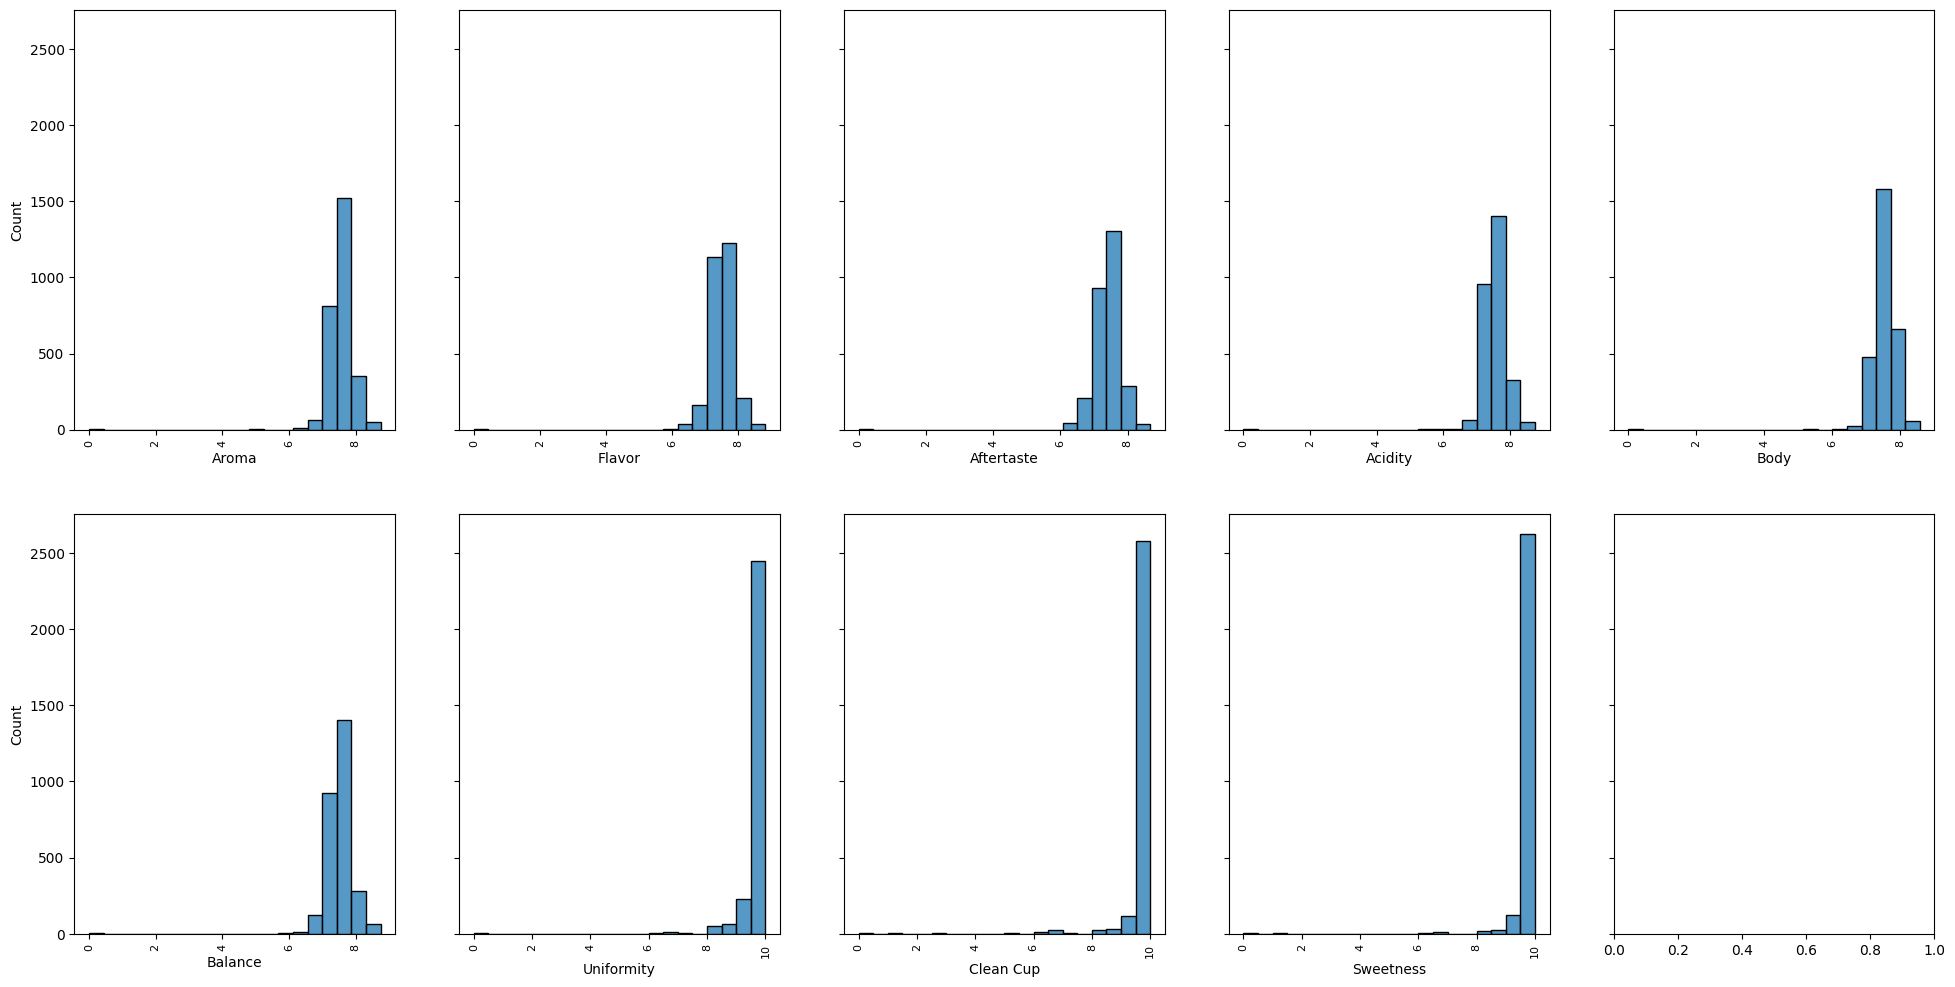

In [ ]:
# function to plot distributions
def plot_feature_distribution(df, features):
    fig, ax = plt.subplots(2, (len(features) // 2) + (len(features) % 2), figsize=(24, 12), sharey=True)
    for pred, axis in zip(features, ax.flatten()):
        sns.histplot(data=df,
                     x=pred,
                     bins=20,
                     ax=axis)
        axis.tick_params(axis="x",
                         labelrotation=90,
                         labelsize=8)
    plt.show()

plot_feature_distribution(df, features)

As seen on graphics almost every value in every column is in range from 6-10, so i have to filter these values

In [13]:
# filtering values
for feature in features:
    df = df[(df[feature] >= 6) & (df[feature] <= 10)]

df.shape

(2789, 10)

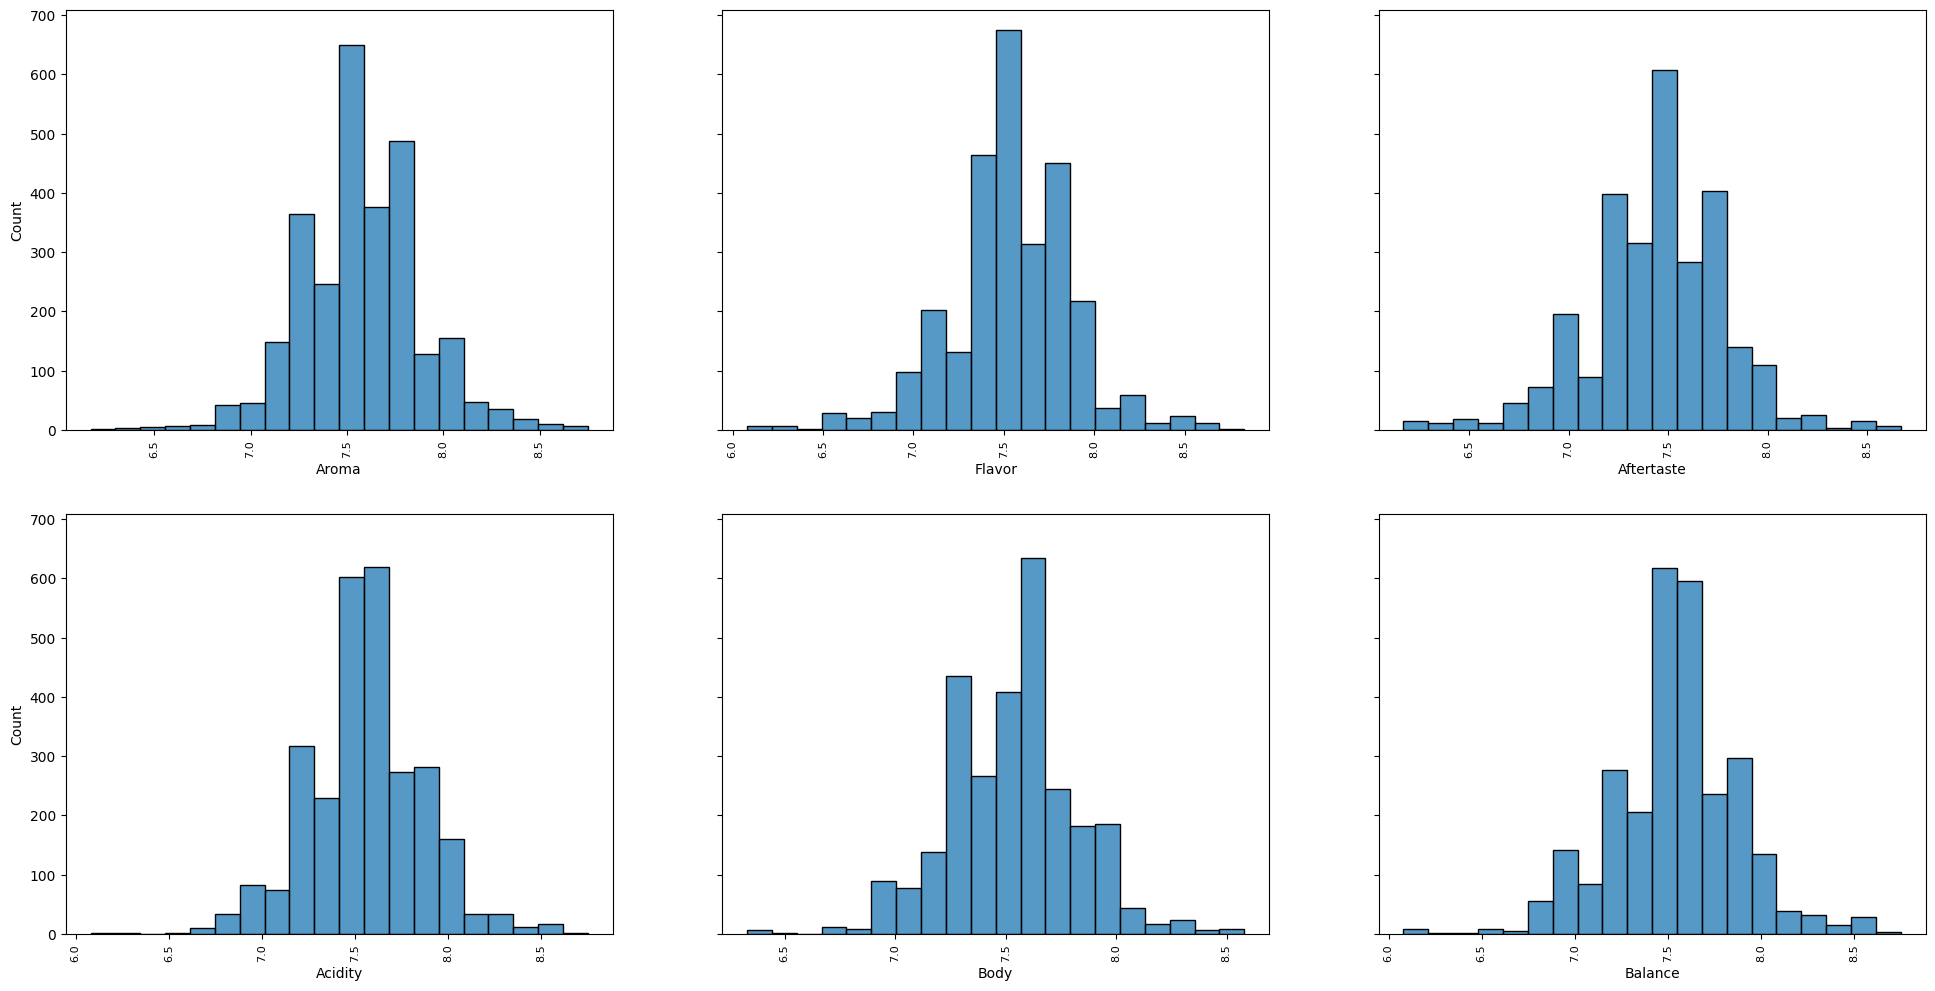

In [ ]:
# normal distributions
plot_feature_distribution(df, features[:6])

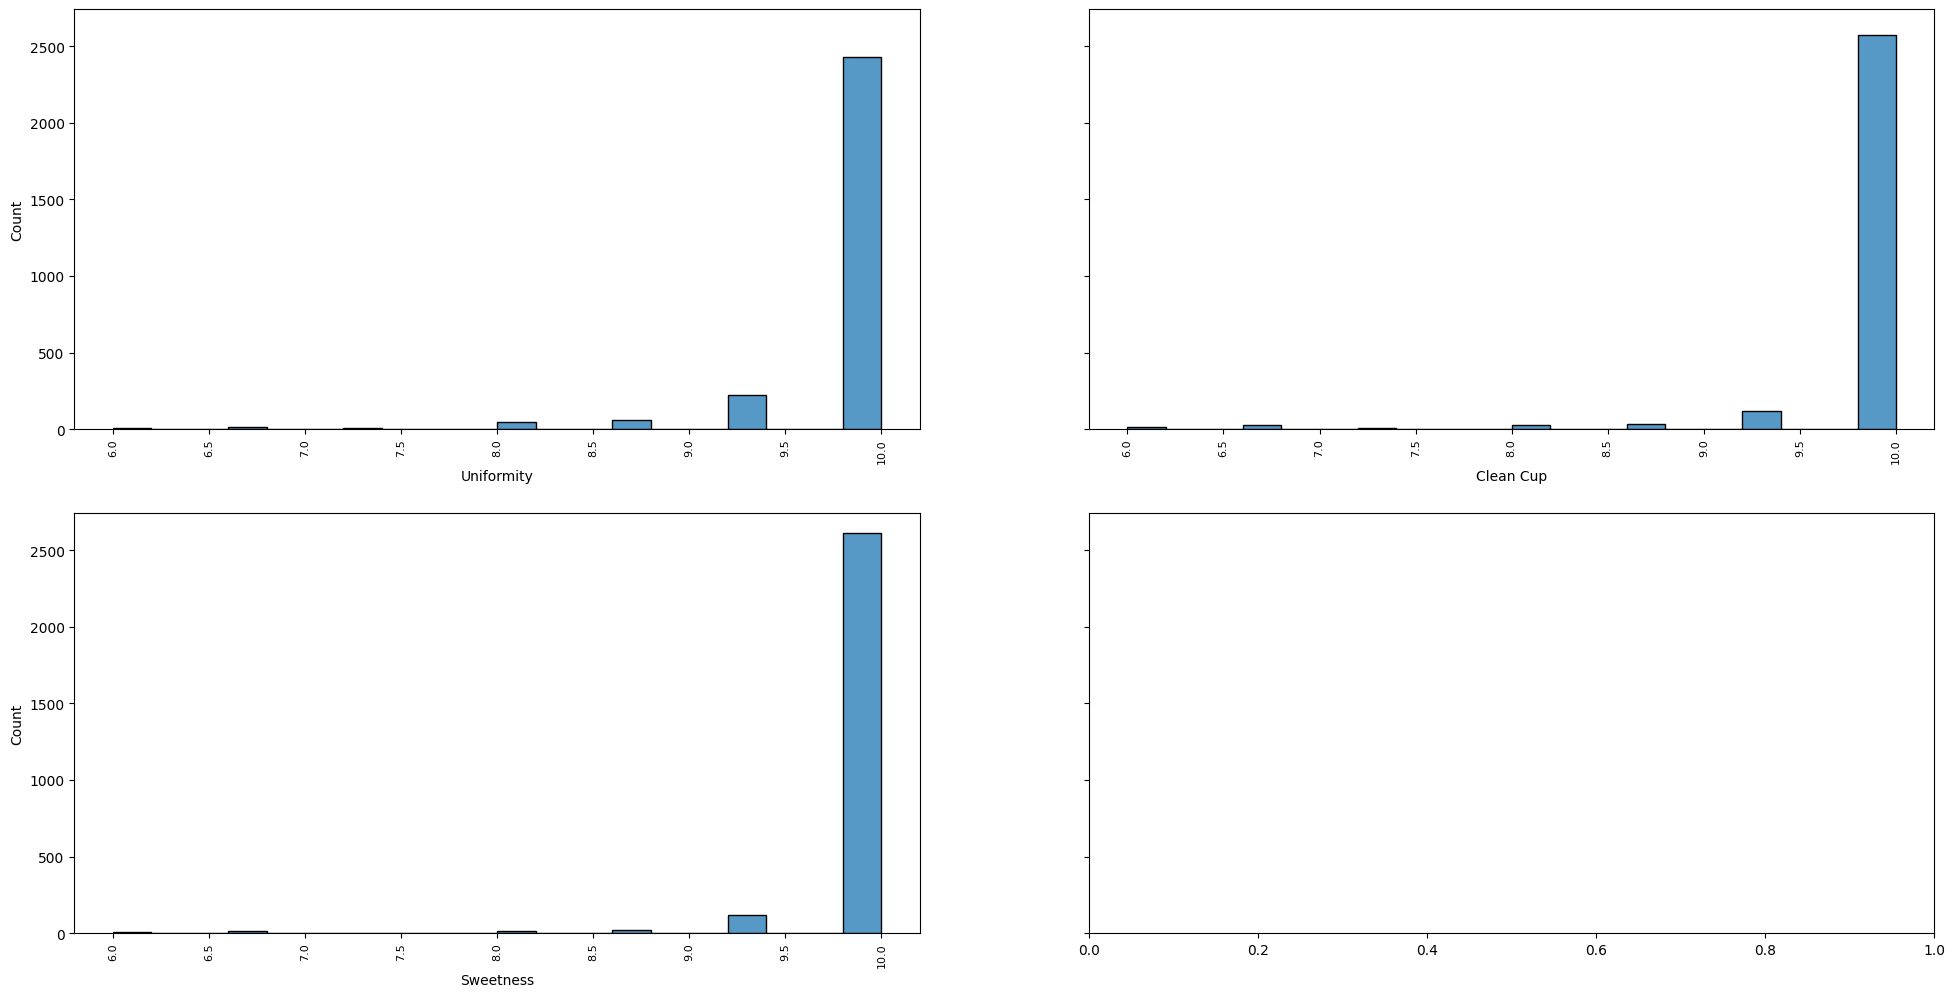

In [ ]:
# left skewed
plot_feature_distribution(df, features[6:])

In [ ]:
for f in features[6:]:
    print(df[f].value_counts(), '\n')

10.00    2429
9.33      224
8.67       61
8.00       47
6.67       14
6.00        6
7.33        4
9.50        2
9.00        2
Name: Uniformity, dtype: int64 

10.00    2572
9.33      115
8.67       32
6.67       26
8.00       26
6.00       12
7.33        6
Name: Clean Cup, dtype: int64 

10.00    2613
9.33      118
8.67       22
8.00       16
6.67       14
6.00        6
Name: Sweetness, dtype: int64 



all these columns wont have valuable impact since their distribution are too skewed, so i would drop it

In [14]:
features = features[:6]

df = df[features + [target]]
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2789 entries, 0 to 2808
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Aroma              2789 non-null   float64
 1   Flavor             2789 non-null   float64
 2   Aftertaste         2789 non-null   float64
 3   Acidity            2789 non-null   float64
 4   Body               2789 non-null   float64
 5   Balance            2789 non-null   float64
 6   Country of Origin  2789 non-null   object 
dtypes: float64(6), object(1)
memory usage: 174.3+ KB
None


Aroma  Flavor  Aftertaste  Acidity  Body  Balance Country of Origin
0   8.58    8.50        8.42     8.58  8.25     8.42          Colombia
1   8.50    8.50        7.92     8.00  7.92     8.25            Taiwan
2   8.33    8.42        8.08     8.17  7.92     8.17              Laos
3   8.08    8.17        8.17     8.25  8.17     8.08        Costa Rica
4   8.33    8.33        8.08     8.25  7.92     7.92          Colombia

done ???

### Target variable distribution

In [15]:
# function to plot target distribution
def plot_distribution(data):
    fig, ax = plt.subplots(figsize=(20, 8))
    barplot = sns.barplot(x=data.index, y=data.values, ax=ax)
    plt.xticks(rotation=90)

    # adding number of observations on top of bars in a plot
    for i in barplot.containers:
        barplot.bar_label(i, )

    plt.xlabel("Name")
    plt.ylabel("Count")
    plt.title("Distribution of countries")

    plt.show()

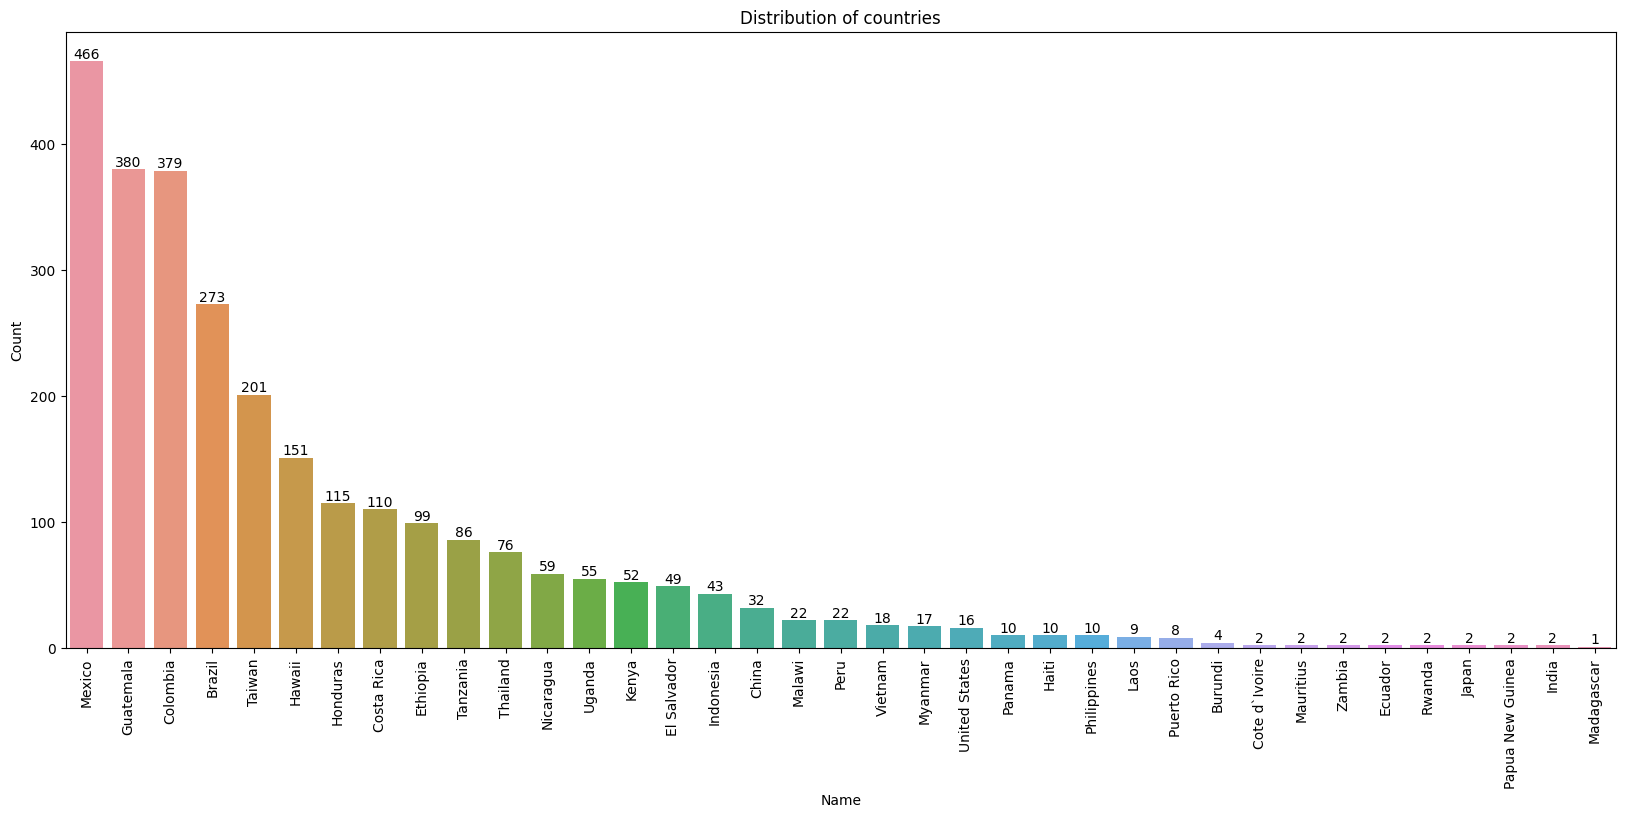

In [16]:
# Creating a distribution of a target variable
countries_dist = df["Country of Origin"].value_counts()

plot_distribution(countries_dist)

The distribution of classes is very uneven and many classes generally have too little data, you can try to reduce the number of classes to the 15 largest in order to get the optimal amount

In [ ]:
# Potential change of the distribution
print(f"Classes\nTotal: {countries_dist.size}")
print(f"Will remain: {15}")
print(f"Will be deleted: {countries_dist.size - 15}\n")
print(f"Observations\nTotal: {countries_dist.sum()}")
print(f"Will remain: {countries_dist[:15].sum()}")
print(f"Will be deleted: {countries_dist.sum() - countries_dist[:15].sum()}")

Classes
Total: 37
Will remain: 15
Will be deleted: 22

Observations
Total: 2789
Will remain: 2551
Will be deleted: 238


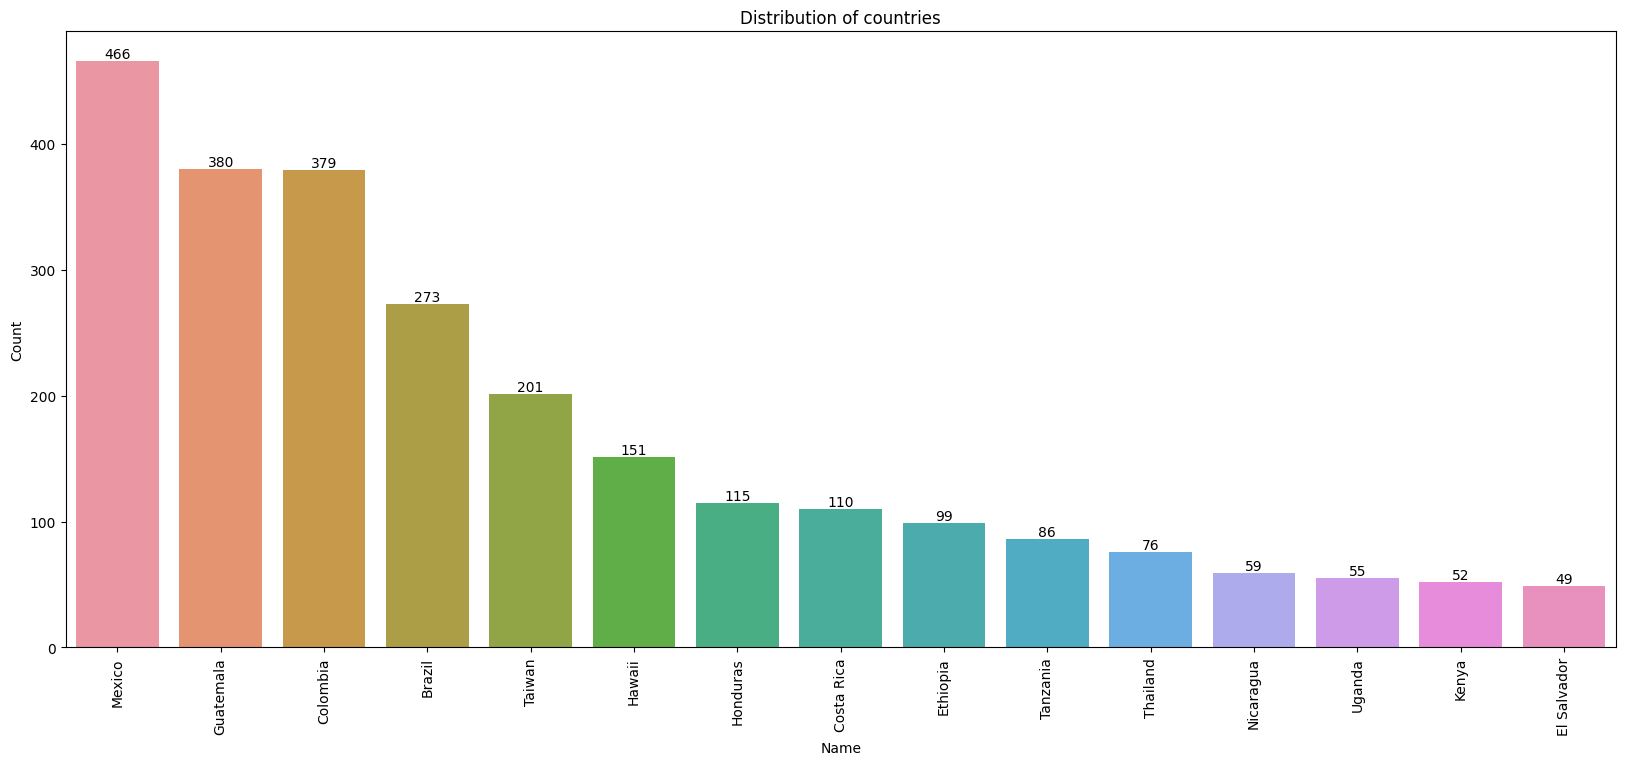

In [ ]:
# potential distribution
plot_distribution(countries_dist[:15])

In [17]:
df = df[df[target].isin(countries_dist[:15].index)]

# index reset again
df = df.reset_index(drop=True)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2551 entries, 0 to 2550
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Aroma              2551 non-null   float64
 1   Flavor             2551 non-null   float64
 2   Aftertaste         2551 non-null   float64
 3   Acidity            2551 non-null   float64
 4   Body               2551 non-null   float64
 5   Balance            2551 non-null   float64
 6   Country of Origin  2551 non-null   object 
dtypes: float64(6), object(1)
memory usage: 139.6+ KB
None


Aroma  Flavor  Aftertaste  Acidity  Body  Balance Country of Origin
0   8.58    8.50        8.42     8.58  8.25     8.42          Colombia
1   8.50    8.50        7.92     8.00  7.92     8.25            Taiwan
2   8.08    8.17        8.17     8.25  8.17     8.08        Costa Rica
3   8.33    8.33        8.08     8.25  7.92     7.92          Colombia
4   8.33    8.33        8.25     7.83  7.83     8.17         Guatemala

The data preparation is complete, now it's time to build the model.

### Over-sampling

Data should be balanced, so I`m gonna use SMOTE to balance all classes

In [18]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = df[features]
y = df[target]

# splitting data into 80% of training (including validation) and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=13,
                                                    stratify=y)

In [19]:
# over-sampling
smote = SMOTE(random_state=13)

smote_X_train, smote_y_train = smote.fit_resample(X_train, y_train)

print(f"Before resampling\nFeatures: {X_train.shape}\n\nTarget:{y_train.shape}")
print(f"After resampling:\nFeatures: {smote_X_train.shape}\n\nTarget:{smote_y_train.shape}")

Before resampling
Features: (2040, 6)

Target:(2040,)
After resampling:
Features: (5595, 6)

Target:(5595,)


In [ ]:
print(y_train.value_counts())
print(smote_y_train.value_counts())

Mexico         373
Guatemala      304
Colombia       303
Brazil         218
Taiwan         161
Hawaii         121
Honduras        92
Costa Rica      88
Ethiopia        79
Tanzania        69
Thailand        61
Nicaragua       47
Uganda          44
Kenya           41
El Salvador     39
Name: Country of Origin, dtype: int64
Colombia       373
Guatemala      373
Brazil         373
Hawaii         373
Taiwan         373
Uganda         373
Mexico         373
Costa Rica     373
El Salvador    373
Tanzania       373
Kenya          373
Nicaragua      373
Thailand       373
Honduras       373
Ethiopia       373
Name: Country of Origin, dtype: int64


## Creating Models

Since I was undecided on the type of model at the beginning of this work, I am thinking of using several models to see which will show the best result. Considering that the data is very unbalanced, I chose the following models:

Decision Tree and Random Forest

In [26]:
# important packages
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, export_graphviz

### Model 1. Decision Tree

Since I don`t have enough experience, I cannot immediately understand which hyperparameters to set in the decision tree, so I will create a GridSearch to select hyperparameters such as max_depth or min_samples_split.

Given that GridSearchCV itself performs cross validation, I will not divide the data into a validation sample, because GridSearch performs it itself on the training data transferred to the model

In [27]:
# function for hyperpamater tuning
def get_best_model(model, params, x, y, n_iter=200):
    model_search = RandomizedSearchCV(model, cv=5, n_iter=n_iter,
                                     param_distributions=params,
                                     verbose=2,
                                     random_state=13)

    model_search.fit(x, y)

    return model_search.best_estimator_

In [ ]:
# hyperparameters to choose from
params = {
    "max_depth": range(2, 16),
    "min_samples_split": range(2, 16),
    "min_samples_leaf": range(2, 16)
}

tree = DecisionTreeClassifier(random_state=13)

# using a function to get a model with best hyperparameters
best_tree = get_best_model(tree, params, smote_X_train, smote_y_train)
best_tree

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV] END max_depth=12, min_samples_leaf=13, min_samples_split=2; total time=   0.1s
[CV] END max_depth=12, min_samples_leaf=13, min_samples_split=2; total time=   0.0s
[CV] END max_depth=12, min_samples_leaf=13, min_samples_split=2; total time=   0.0s
[CV] END max_depth=12, min_samples_leaf=13, min_samples_split=2; total time=   0.1s
[CV] END max_depth=12, min_samples_leaf=13, min_samples_split=2; total time=   0.0s
[CV] END max_depth=13, min_samples_leaf=8, min_samples_split=11; total time=   0.1s
[CV] END max_depth=13, min_samples_leaf=8, min_samples_split=11; total time=   0.0s
[CV] END max_depth=13, min_samples_leaf=8, min_samples_split=11; total time=   0.1s
[CV] END max_depth=13, min_samples_leaf=8, min_samples_split=11; total time=   0.1s
[CV] END max_depth=13, min_samples_leaf=8, min_samples_split=11; total time=   0.1s
[CV] END max_depth=14, min_samples_leaf=8, min_samples_split=6; total time=   0.1s
[CV] END max_

DecisionTreeClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=4,
                       random_state=13)

In [ ]:
# Tree visualisation package
import graphviz

dot_data = export_graphviz(best_tree,
                           out_file=None,
                           feature_names=X_test.columns,
                           class_names=y_test.values,
                           filled=True,
                           rounded=True)

graph = graphviz.Source(dot_data)
graph

### More useful functions

In [20]:
def plot_confusion_matrix(model, true, predicted):
    """
    Creates confusion matrix heatmap
    """
    cm = confusion_matrix(true, predicted)

    fig, ax = plt.subplots(figsize=(15, 8))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=model.classes_)

    disp.plot(ax=ax, text_kw={"fontsize": 14})
    plt.xticks(rotation=90, fontsize=14)
    plt.yticks(fontsize=14)

    plt.title("Correctness of predictions", fontsize=20)
    plt.xlabel("Predicted", fontsize=16)
    plt.ylabel("Actual", fontsize=16)
    plt.grid(False)
    plt.show()

In [21]:
def get_score_and_cm(model, x, y):
    """
    Constructs score matrix and visualizes the confusion matrix
    """
    pred = model.predict(x)

    # classification report
    print(classification_report(y, pred))

    # heatmap of confusion matrix
    plot_confusion_matrix(model, y, pred)

Validated train data

              precision    recall  f1-score   support

      Brazil       0.84      0.94      0.89       373
    Colombia       0.83      0.92      0.87       373
  Costa Rica       0.92      0.93      0.92       373
 El Salvador       0.94      0.97      0.95       373
    Ethiopia       0.94      0.96      0.95       373
   Guatemala       0.86      0.87      0.86       373
      Hawaii       0.95      0.92      0.94       373
    Honduras       0.93      0.89      0.91       373
       Kenya       0.96      0.94      0.95       373
      Mexico       0.87      0.86      0.86       373
   Nicaragua       0.96      0.88      0.92       373
      Taiwan       0.83      0.84      0.84       373
    Tanzania       0.92      0.95      0.93       373
    Thailand       0.99      0.87      0.93       373
      Uganda       0.97      0.94      0.96       373

    accuracy                           0.91      5595
   macro avg       0.91      0.91      0.91      5595
weighted avg       0.91   

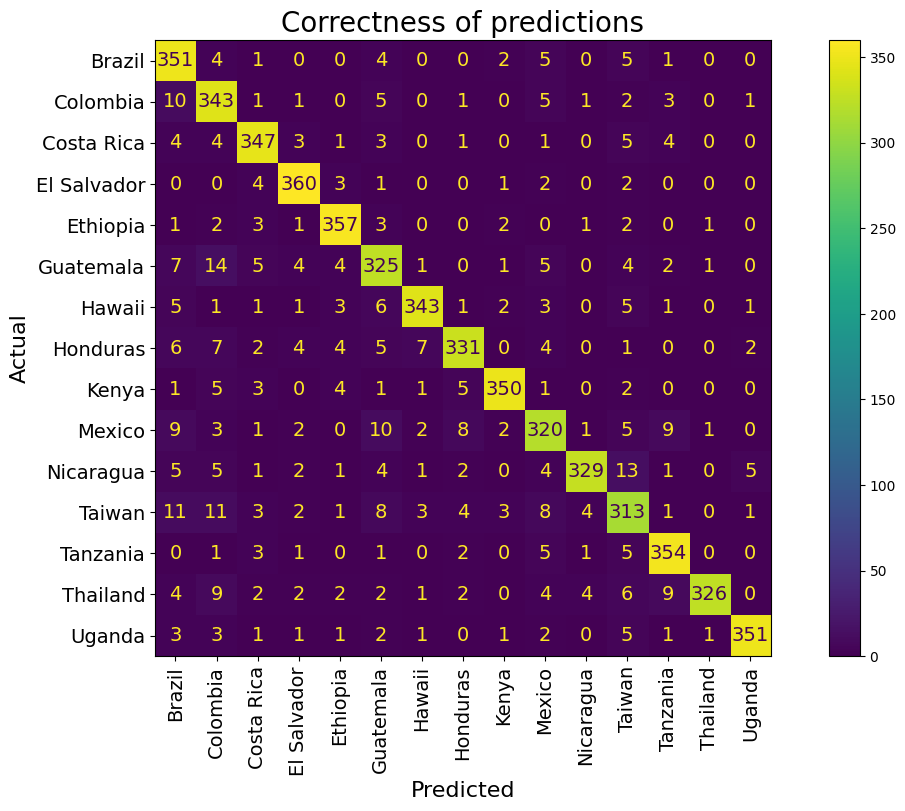

In [ ]:
get_score_and_cm(best_tree, smote_X_train, smote_y_train)

Test data

              precision    recall  f1-score   support

      Brazil       0.48      0.55      0.51        55
    Colombia       0.62      0.61      0.61        76
  Costa Rica       0.43      0.68      0.53        22
 El Salvador       0.31      0.40      0.35        10
    Ethiopia       0.50      0.55      0.52        20
   Guatemala       0.52      0.51      0.52        76
      Hawaii       0.48      0.40      0.44        30
    Honduras       0.48      0.48      0.48        23
       Kenya       0.47      0.73      0.57        11
      Mexico       0.56      0.49      0.53        93
   Nicaragua       0.46      0.50      0.48        12
      Taiwan       0.38      0.33      0.35        40
    Tanzania       0.53      0.59      0.56        17
    Thailand       0.36      0.27      0.31        15
      Uganda       0.17      0.09      0.12        11

    accuracy                           0.50       511
   macro avg       0.45      0.48      0.46       511
weighted avg       0.50   

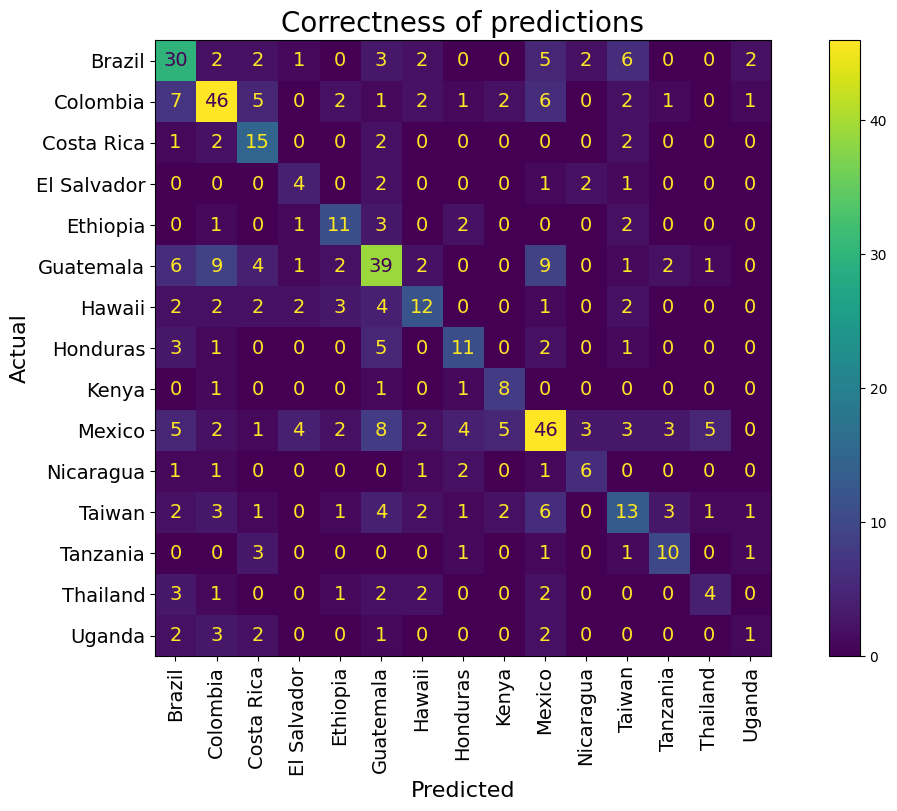

In [ ]:
get_score_and_cm(best_tree, X_test, y_test)

model is overfitted 90% on train and 50% on test

### Model 2. Random Forest

A tree shows overfitting.
Now i will try RandomForest of trees and see if it shows a better result

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# сreating a random forest
rfc = RandomForestClassifier(random_state=13)

# hyperparameters for a forest
rfc_params = params.copy()
rfc_params["n_estimators"] = range(20, 51)
rfc_params["criterion"] = ["gini", "entropy", "log_loss"]

#### Creating a model

In [ ]:
# model with best hyperparameters
best_rfc = get_best_model(rfc, rfc_params, smote_X_train, smote_y_train, 300)
best_rfc

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[CV] END criterion=log_loss, max_depth=11, min_samples_leaf=13, min_samples_split=6, n_estimators=24; total time=   0.3s
[CV] END criterion=log_loss, max_depth=11, min_samples_leaf=13, min_samples_split=6, n_estimators=24; total time=   0.3s
[CV] END criterion=log_loss, max_depth=11, min_samples_leaf=13, min_samples_split=6, n_estimators=24; total time=   0.3s
[CV] END criterion=log_loss, max_depth=11, min_samples_leaf=13, min_samples_split=6, n_estimators=24; total time=   0.3s
[CV] END criterion=log_loss, max_depth=11, min_samples_leaf=13, min_samples_split=6, n_estimators=24; total time=   0.3s
[CV] END criterion=log_loss, max_depth=3, min_samples_leaf=6, min_samples_split=15, n_estimators=29; total time=   0.2s
[CV] END criterion=log_loss, max_depth=3, min_samples_leaf=6, min_samples_split=15, n_estimators=29; total time=   0.2s
[CV] END criterion=log_loss, max_depth=3, min_samples_leaf=6, min_samples_split=15, n_estim

RandomForestClassifier(criterion='log_loss', max_depth=15, min_samples_leaf=3,
                       min_samples_split=5, n_estimators=38, random_state=13)

Train data

              precision    recall  f1-score   support

      Brazil       0.96      0.96      0.96       373
    Colombia       0.92      0.94      0.93       373
  Costa Rica       0.99      0.99      0.99       373
 El Salvador       0.99      0.99      0.99       373
    Ethiopia       0.97      1.00      0.98       373
   Guatemala       0.95      0.92      0.94       373
      Hawaii       0.99      0.98      0.99       373
    Honduras       0.98      0.97      0.97       373
       Kenya       0.97      0.99      0.98       373
      Mexico       0.94      0.90      0.92       373
   Nicaragua       1.00      0.97      0.99       373
      Taiwan       0.97      0.96      0.97       373
    Tanzania       0.98      0.99      0.99       373
    Thailand       0.99      0.99      0.99       373
      Uganda       0.98      1.00      0.99       373

    accuracy                           0.97      5595
   macro avg       0.97      0.97      0.97      5595
weighted avg       0.97   

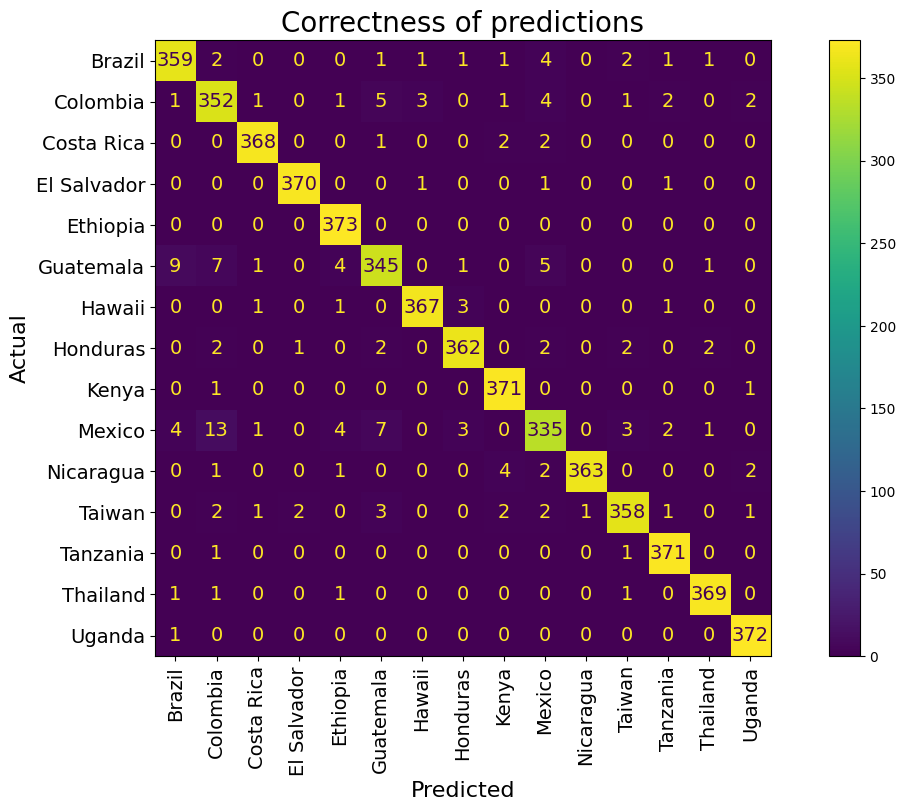

In [ ]:
get_score_and_cm(best_rfc, smote_X_train, smote_y_train)

Test data

              precision    recall  f1-score   support

      Brazil       0.63      0.58      0.60        55
    Colombia       0.67      0.74      0.70        76
  Costa Rica       0.56      0.82      0.67        22
 El Salvador       1.00      0.30      0.46        10
    Ethiopia       0.50      0.60      0.55        20
   Guatemala       0.73      0.61      0.66        76
      Hawaii       0.62      0.60      0.61        30
    Honduras       0.62      0.57      0.59        23
       Kenya       0.42      0.91      0.57        11
      Mexico       0.66      0.58      0.62        93
   Nicaragua       0.80      0.67      0.73        12
      Taiwan       0.61      0.62      0.62        40
    Tanzania       0.64      0.82      0.72        17
    Thailand       0.47      0.47      0.47        15
      Uganda       0.55      0.55      0.55        11

    accuracy                           0.63       511
   macro avg       0.63      0.63      0.61       511
weighted avg       0.65   

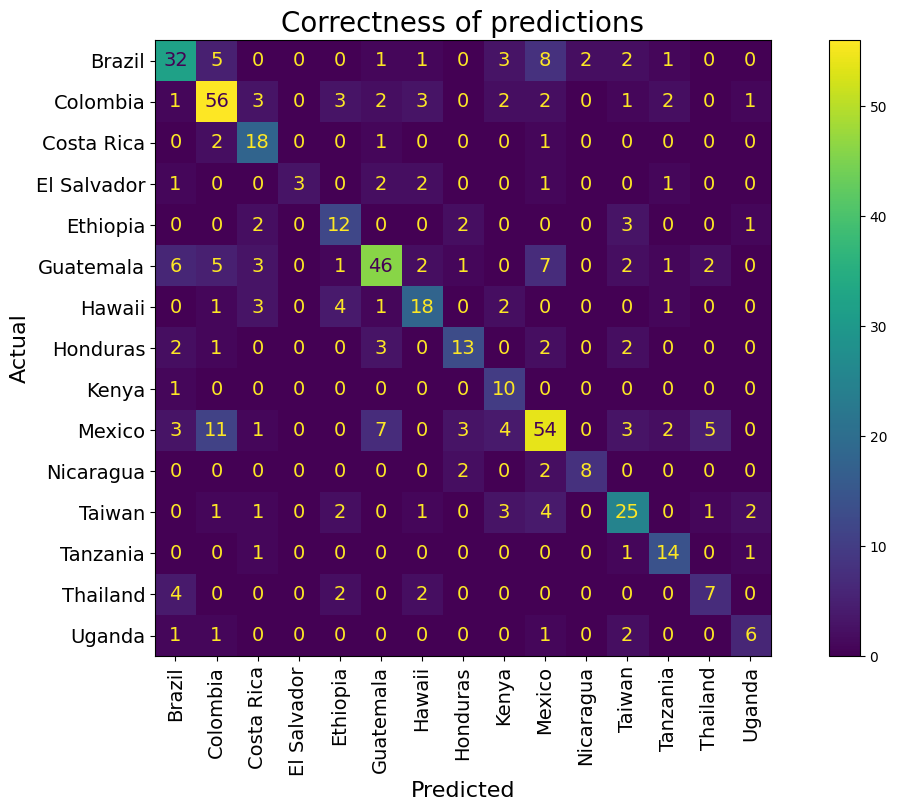

In [ ]:
get_score_and_cm(best_rfc, X_test, y_test)

its much better, 60% on test data is FUCKING GOOD!

#### Model with more test data (30%)

In [ ]:
# new split with 30% test data instead of 20%
X_train_30, X_test_30, y_train_30, y_test_30 = train_test_split(X, y, test_size=0.3,
                                                    stratify=y,
                                                    random_state=13)

# over sampling new data
smote_X_train_30, smote_y_train_30 = smote.fit_resample(X_train_30, y_train_30)

In [ ]:
# new model
best_rfc_30 = get_best_model(rfc, rfc_params, smote_X_train_30, smote_y_train_30, 300)
best_rfc_30

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[CV] END criterion=log_loss, max_depth=11, min_samples_leaf=13, min_samples_split=6, n_estimators=24; total time=   0.3s
[CV] END criterion=log_loss, max_depth=11, min_samples_leaf=13, min_samples_split=6, n_estimators=24; total time=   0.3s
[CV] END criterion=log_loss, max_depth=11, min_samples_leaf=13, min_samples_split=6, n_estimators=24; total time=   0.3s
[CV] END criterion=log_loss, max_depth=11, min_samples_leaf=13, min_samples_split=6, n_estimators=24; total time=   0.3s
[CV] END criterion=log_loss, max_depth=11, min_samples_leaf=13, min_samples_split=6, n_estimators=24; total time=   0.3s
[CV] END criterion=log_loss, max_depth=3, min_samples_leaf=6, min_samples_split=15, n_estimators=29; total time=   0.2s
[CV] END criterion=log_loss, max_depth=3, min_samples_leaf=6, min_samples_split=15, n_estimators=29; total time=   0.2s
[CV] END criterion=log_loss, max_depth=3, min_samples_leaf=6, min_samples_split=15, n_estim

RandomForestClassifier(criterion='log_loss', max_depth=15, min_samples_leaf=3,
                       min_samples_split=5, n_estimators=38, random_state=13)

Train data

              precision    recall  f1-score   support

      Brazil       0.98      0.93      0.95       326
    Colombia       0.94      0.94      0.94       326
  Costa Rica       0.97      0.98      0.97       326
 El Salvador       0.98      0.99      0.99       326
    Ethiopia       0.95      0.99      0.97       326
   Guatemala       0.95      0.90      0.93       326
      Hawaii       0.97      0.98      0.98       326
    Honduras       0.97      0.97      0.97       326
       Kenya       0.97      0.99      0.98       326
      Mexico       0.95      0.92      0.93       326
   Nicaragua       0.97      0.98      0.98       326
      Taiwan       0.98      0.96      0.97       326
    Tanzania       0.96      0.99      0.98       326
    Thailand       0.98      0.98      0.98       326
      Uganda       0.97      1.00      0.98       326

    accuracy                           0.97      4890
   macro avg       0.97      0.97      0.97      4890
weighted avg       0.97   

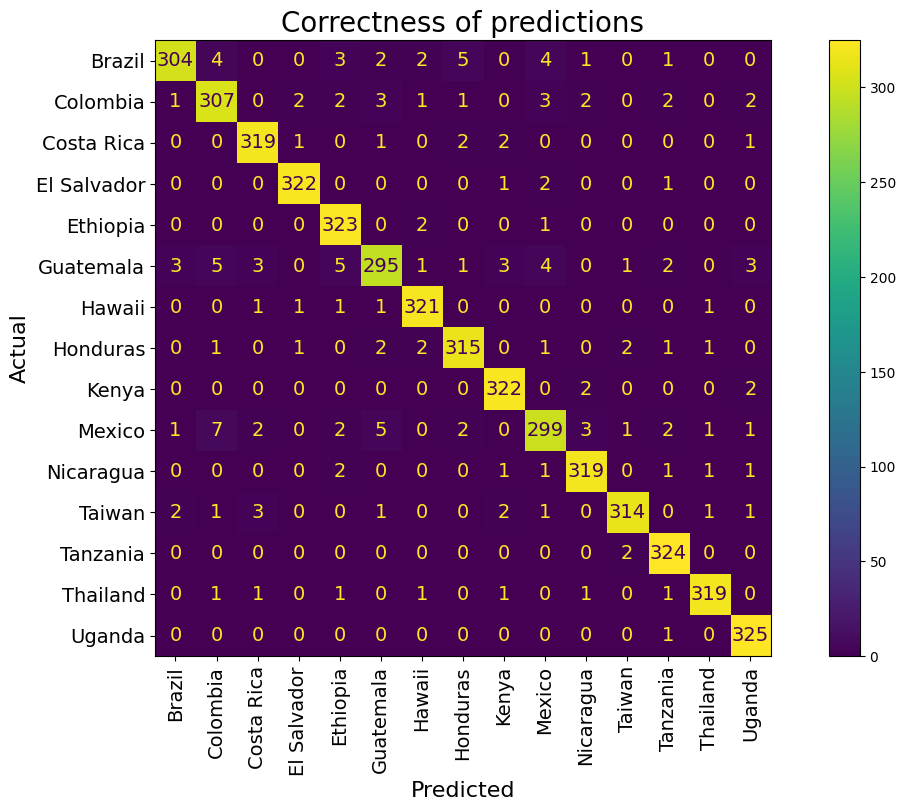

In [ ]:
get_score_and_cm(best_rfc_30, smote_X_train_30, smote_y_train_30)

Test data

              precision    recall  f1-score   support

      Brazil       0.67      0.49      0.56        82
    Colombia       0.63      0.67      0.65       114
  Costa Rica       0.64      0.70      0.67        33
 El Salvador       0.20      0.33      0.25        15
    Ethiopia       0.47      0.57      0.52        30
   Guatemala       0.74      0.53      0.62       114
      Hawaii       0.62      0.64      0.63        45
    Honduras       0.50      0.53      0.51        34
       Kenya       0.38      0.62      0.48        16
      Mexico       0.67      0.61      0.64       140
   Nicaragua       0.62      0.72      0.67        18
      Taiwan       0.59      0.62      0.60        60
    Tanzania       0.49      0.77      0.60        26
    Thailand       0.61      0.61      0.61        23
      Uganda       0.48      0.62      0.54        16

    accuracy                           0.60       766
   macro avg       0.55      0.60      0.57       766
weighted avg       0.62   

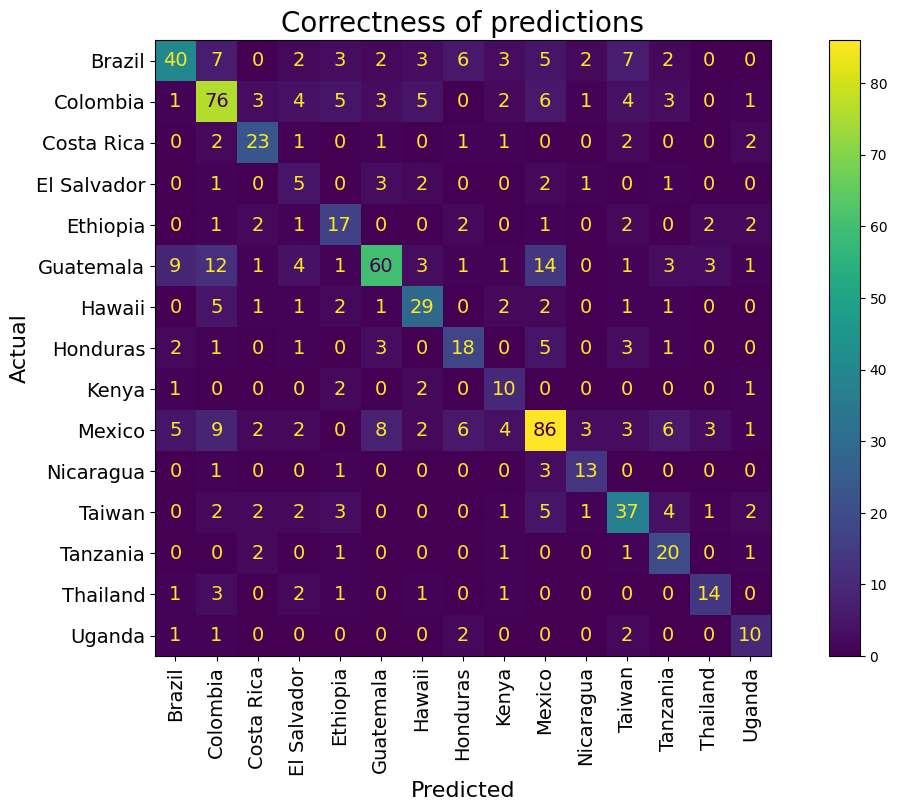

In [ ]:
get_score_and_cm(best_rfc_30, X_test_30, y_test_30)

Nothing changed, but I want to try 65-35 split. Just for fun

#### Model with 35% test data

In [ ]:
# new split with 35% test data
X_train_35, X_test_35, y_train_35, y_test_35 = train_test_split(X, y, test_size=0.35,
                                                    stratify=y,
                                                    random_state=13)

# over sampling new data
smote_X_train_35, smote_y_train_35 = smote.fit_resample(X_train_35, y_train_35)

In [ ]:
# model selection
best_rfc_35 = get_best_model(rfc, rfc_params, smote_X_train_35, smote_y_train_35)
best_rfc_35

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV] END criterion=log_loss, max_depth=11, min_samples_leaf=13, min_samples_split=6, n_estimators=24; total time=   0.3s
[CV] END criterion=log_loss, max_depth=11, min_samples_leaf=13, min_samples_split=6, n_estimators=24; total time=   0.3s
[CV] END criterion=log_loss, max_depth=11, min_samples_leaf=13, min_samples_split=6, n_estimators=24; total time=   0.3s
[CV] END criterion=log_loss, max_depth=11, min_samples_leaf=13, min_samples_split=6, n_estimators=24; total time=   0.3s
[CV] END criterion=log_loss, max_depth=11, min_samples_leaf=13, min_samples_split=6, n_estimators=24; total time=   0.3s
[CV] END criterion=log_loss, max_depth=3, min_samples_leaf=6, min_samples_split=15, n_estimators=29; total time=   0.2s
[CV] END criterion=log_loss, max_depth=3, min_samples_leaf=6, min_samples_split=15, n_estimators=29; total time=   0.2s
[CV] END criterion=log_loss, max_depth=3, min_samples_leaf=6, min_samples_split=15, n_estim

RandomForestClassifier(criterion='log_loss', max_depth=15, min_samples_leaf=3,
                       min_samples_split=5, n_estimators=38, random_state=13)

Trained validated data

              precision    recall  f1-score   support

      Brazil       0.98      0.93      0.95       303
    Colombia       0.94      0.96      0.95       303
  Costa Rica       0.96      0.98      0.97       303
 El Salvador       0.99      1.00      1.00       303
    Ethiopia       0.96      1.00      0.98       303
   Guatemala       0.96      0.90      0.93       303
      Hawaii       0.98      0.97      0.98       303
    Honduras       0.96      0.98      0.97       303
       Kenya       0.98      0.99      0.99       303
      Mexico       0.93      0.90      0.92       303
   Nicaragua       0.96      0.99      0.98       303
      Taiwan       0.98      0.97      0.97       303
    Tanzania       0.97      0.99      0.98       303
    Thailand       1.00      0.98      0.99       303
      Uganda       0.98      0.99      0.99       303

    accuracy                           0.97      4545
   macro avg       0.97      0.97      0.97      4545
weighted avg       0.97   

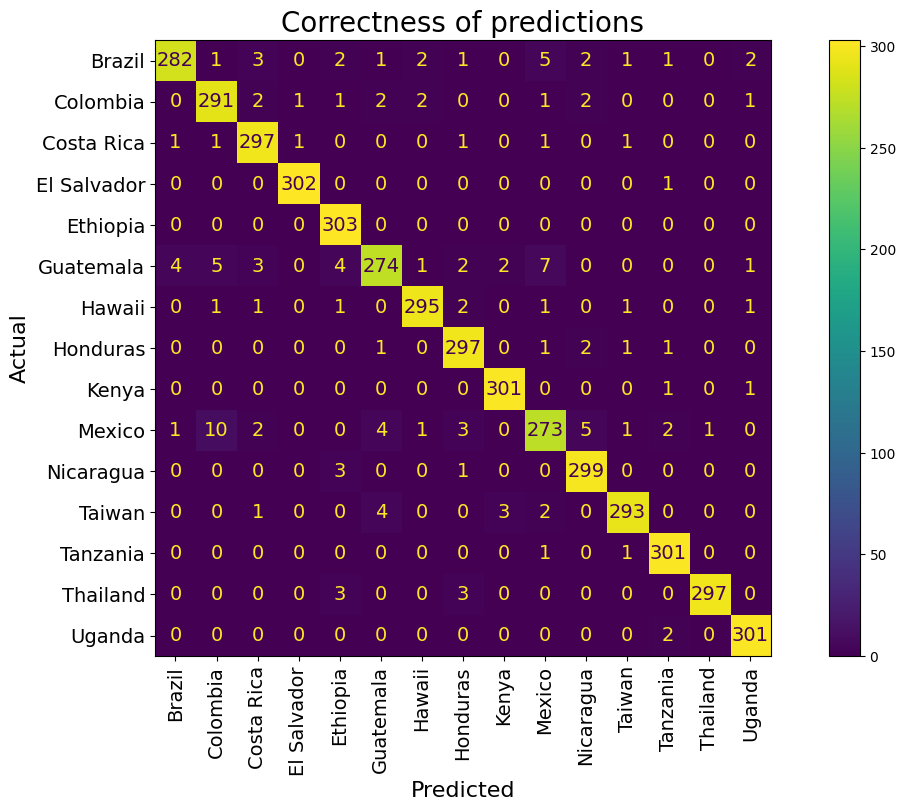

In [ ]:
get_score_and_cm(best_rfc_35, smote_X_train_35, smote_y_train_35)

Test data

              precision    recall  f1-score   support

      Brazil       0.58      0.48      0.53        96
    Colombia       0.67      0.64      0.65       133
  Costa Rica       0.49      0.68      0.57        38
 El Salvador       0.35      0.41      0.38        17
    Ethiopia       0.40      0.54      0.46        35
   Guatemala       0.71      0.50      0.59       133
      Hawaii       0.63      0.58      0.61        53
    Honduras       0.46      0.53      0.49        40
       Kenya       0.46      0.72      0.57        18
      Mexico       0.58      0.54      0.56       163
   Nicaragua       0.52      0.62      0.57        21
      Taiwan       0.58      0.51      0.55        70
    Tanzania       0.38      0.60      0.47        30
    Thailand       0.56      0.74      0.63        27
      Uganda       0.39      0.58      0.47        19

    accuracy                           0.56       893
   macro avg       0.52      0.58      0.54       893
weighted avg       0.58   

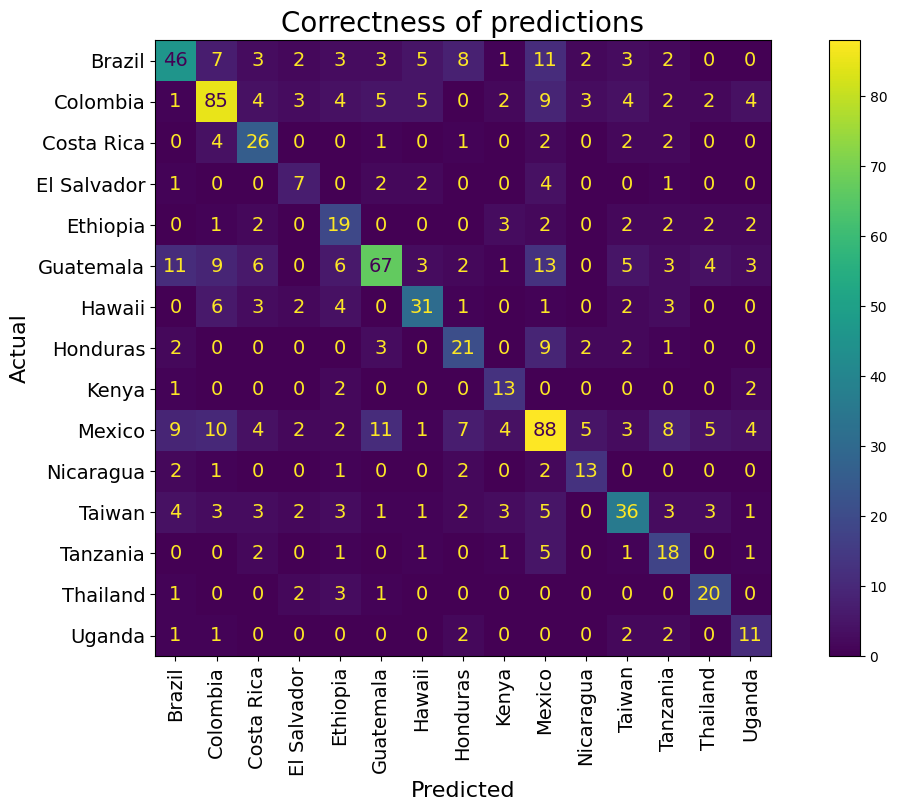

In [ ]:
get_score_and_cm(best_rfc_35, X_test_35, y_test_35)

it gets worse, so i`ll stick to 20%

### Model 4. GradientBoost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

grad_params = params.copy()
grad_params["n_estimators"] = range(41)

gradient_clf = GradientBoostingClassifier(random_state=13)

best_grad = get_best_model(gradient_clf, grad_params, smote_X_train, smote_y_train)
best_grad

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV] END max_depth=14, min_samples_leaf=5, min_samples_split=13, n_estimators=37; total time=  22.9s
[CV] END max_depth=14, min_samples_leaf=5, min_samples_split=13, n_estimators=37; total time=  20.7s
[CV] END max_depth=14, min_samples_leaf=5, min_samples_split=13, n_estimators=37; total time=  21.0s
[CV] END max_depth=14, min_samples_leaf=5, min_samples_split=13, n_estimators=37; total time=  19.7s
[CV] END max_depth=14, min_samples_leaf=5, min_samples_split=13, n_estimators=37; total time=  20.3s
[CV] END max_depth=7, min_samples_leaf=14, min_samples_split=7, n_estimators=7; total time=   2.0s
[CV] END max_depth=7, min_samples_leaf=14, min_samples_split=7, n_estimators=7; total time=   1.9s
[CV] END max_depth=7, min_samples_leaf=14, min_samples_split=7, n_estimators=7; total time=   1.8s
[CV] END max_depth=7, min_samples_leaf=14, min_samples_split=7, n_estimators=7; total time=   2.4s
[CV] END max_depth=7, min_samples_l

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py", line 420, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

GradientBoostingClassifier(max_depth=15, min_samples_leaf=11,
                           min_samples_split=11, n_estimators=40,
                           random_state=13)

Validated training data

              precision    recall  f1-score   support

      Brazil       1.00      1.00      1.00       373
    Colombia       1.00      1.00      1.00       373
  Costa Rica       1.00      1.00      1.00       373
 El Salvador       1.00      1.00      1.00       373
    Ethiopia       1.00      1.00      1.00       373
   Guatemala       0.99      1.00      1.00       373
      Hawaii       0.99      1.00      1.00       373
    Honduras       1.00      0.99      0.99       373
       Kenya       1.00      1.00      1.00       373
      Mexico       0.99      0.99      0.99       373
   Nicaragua       1.00      1.00      1.00       373
      Taiwan       1.00      1.00      1.00       373
    Tanzania       1.00      1.00      1.00       373
    Thailand       1.00      1.00      1.00       373
      Uganda       1.00      1.00      1.00       373

    accuracy                           1.00      5595
   macro avg       1.00      1.00      1.00      5595
weighted avg       1.00   

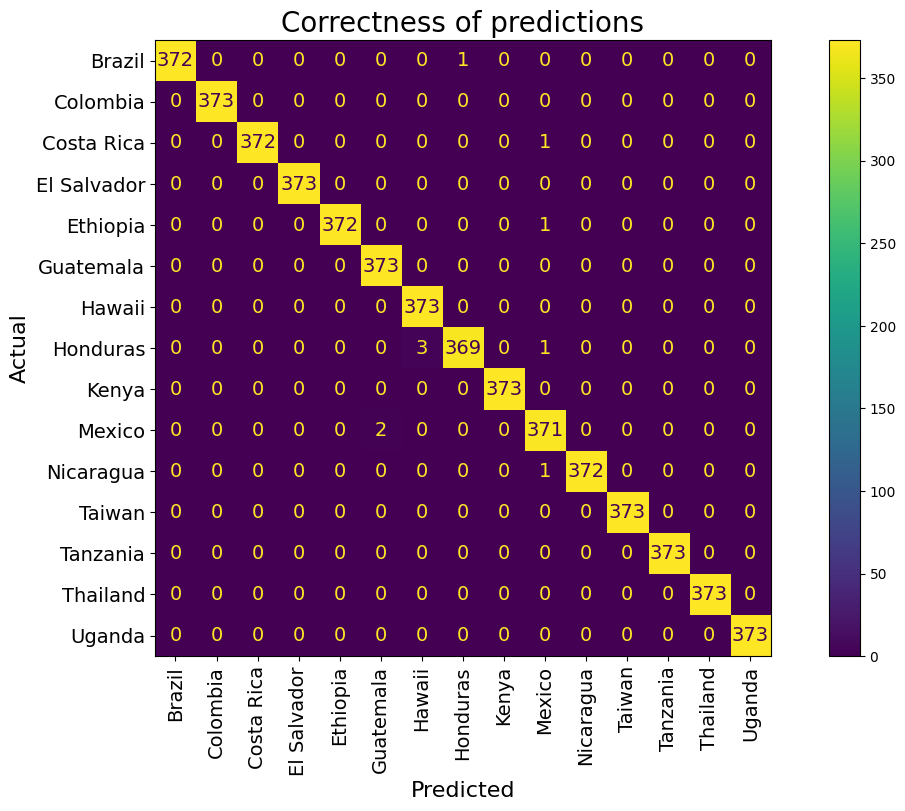

In [39]:
boost_pred = best_grad.predict(smote_X_train)

get_score_and_cm(best_grad, smote_X_train, smote_y_train)

Test data

              precision    recall  f1-score   support

      Brazil       0.76      0.69      0.72        55
    Colombia       0.80      0.88      0.84        76
  Costa Rica       0.67      0.82      0.73        22
 El Salvador       1.00      0.40      0.57        10
    Ethiopia       0.48      0.55      0.51        20
   Guatemala       0.87      0.78      0.82        76
      Hawaii       0.71      0.67      0.69        30
    Honduras       0.62      0.70      0.65        23
       Kenya       0.71      0.91      0.80        11
      Mexico       0.80      0.86      0.83        93
   Nicaragua       1.00      0.75      0.86        12
      Taiwan       0.71      0.68      0.69        40
    Tanzania       0.88      0.88      0.88        17
    Thailand       0.62      0.67      0.65        15
      Uganda       0.71      0.45      0.56        11

    accuracy                           0.76       511
   macro avg       0.76      0.71      0.72       511
weighted avg       0.77   

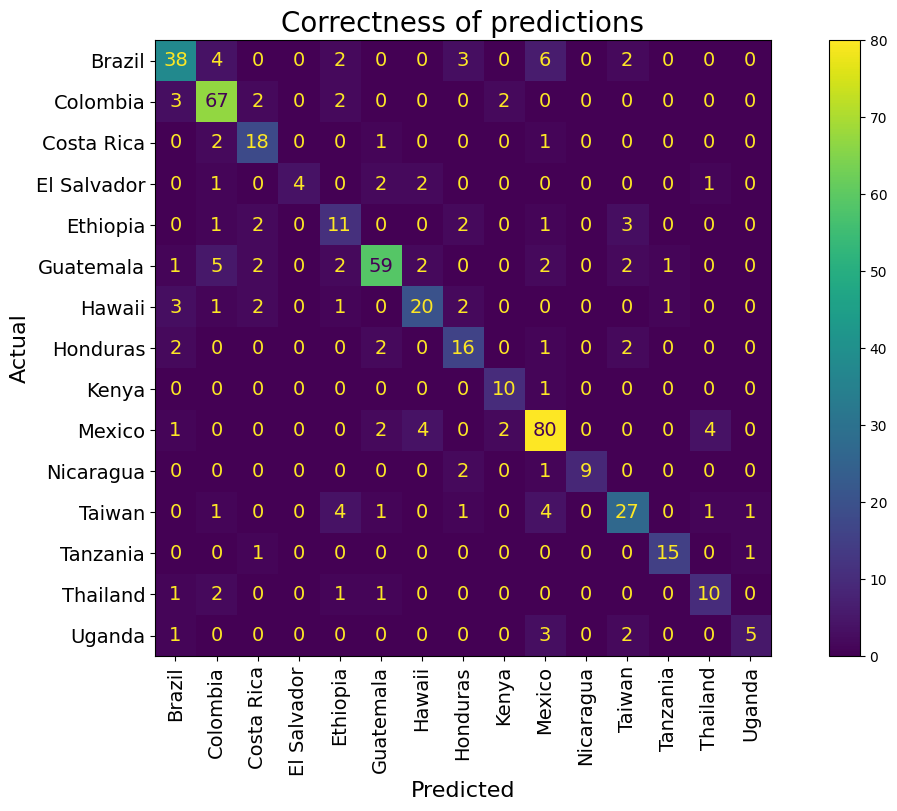

In [40]:
boost_pred = best_grad.predict(X_test)

get_score_and_cm(best_grad, X_test, y_test)

76% weighted avg  
SHEEEEEEEEEEEEESH

### Saving the model

In [46]:
import pickle

pickle.dump(best_grad, open('GradientBoost_15_countries_76%.sav', 'wb'))

###Loading the model

In [1]:
import joblib
from io import BytesIO

import requests

URL = "https://raw.githubusercontent.com/mitwnkl/coffee_classification/main/GradientBoost_15_countries_76%.sav"
imported_model = joblib.load(BytesIO(requests.get(URL).content))

              precision    recall  f1-score   support

      Brazil       1.00      1.00      1.00       373
    Colombia       1.00      1.00      1.00       373
  Costa Rica       1.00      1.00      1.00       373
 El Salvador       1.00      1.00      1.00       373
    Ethiopia       1.00      1.00      1.00       373
   Guatemala       0.99      1.00      1.00       373
      Hawaii       0.99      1.00      1.00       373
    Honduras       1.00      0.99      0.99       373
       Kenya       1.00      1.00      1.00       373
      Mexico       0.99      0.99      0.99       373
   Nicaragua       1.00      1.00      1.00       373
      Taiwan       1.00      1.00      1.00       373
    Tanzania       1.00      1.00      1.00       373
    Thailand       1.00      1.00      1.00       373
      Uganda       1.00      1.00      1.00       373

    accuracy                           1.00      5595
   macro avg       1.00      1.00      1.00      5595
weighted avg       1.00   

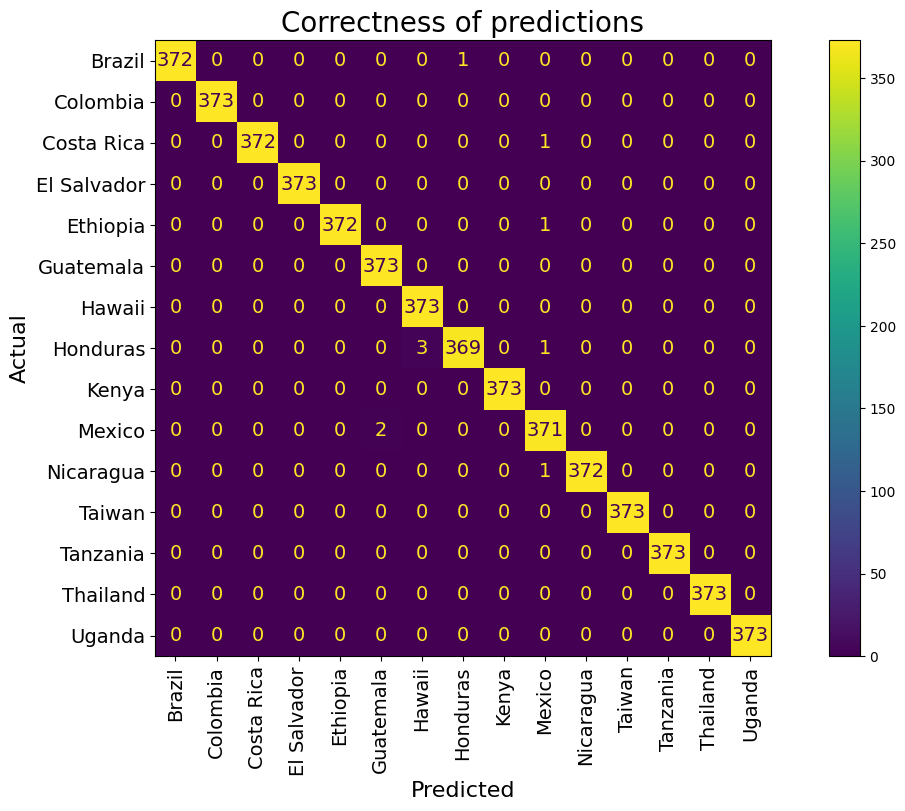

              precision    recall  f1-score   support

      Brazil       0.76      0.69      0.72        55
    Colombia       0.80      0.88      0.84        76
  Costa Rica       0.67      0.82      0.73        22
 El Salvador       1.00      0.40      0.57        10
    Ethiopia       0.48      0.55      0.51        20
   Guatemala       0.87      0.78      0.82        76
      Hawaii       0.71      0.67      0.69        30
    Honduras       0.62      0.70      0.65        23
       Kenya       0.71      0.91      0.80        11
      Mexico       0.80      0.86      0.83        93
   Nicaragua       1.00      0.75      0.86        12
      Taiwan       0.71      0.68      0.69        40
    Tanzania       0.88      0.88      0.88        17
    Thailand       0.62      0.67      0.65        15
      Uganda       0.71      0.45      0.56        11

    accuracy                           0.76       511
   macro avg       0.76      0.71      0.72       511
weighted avg       0.77   

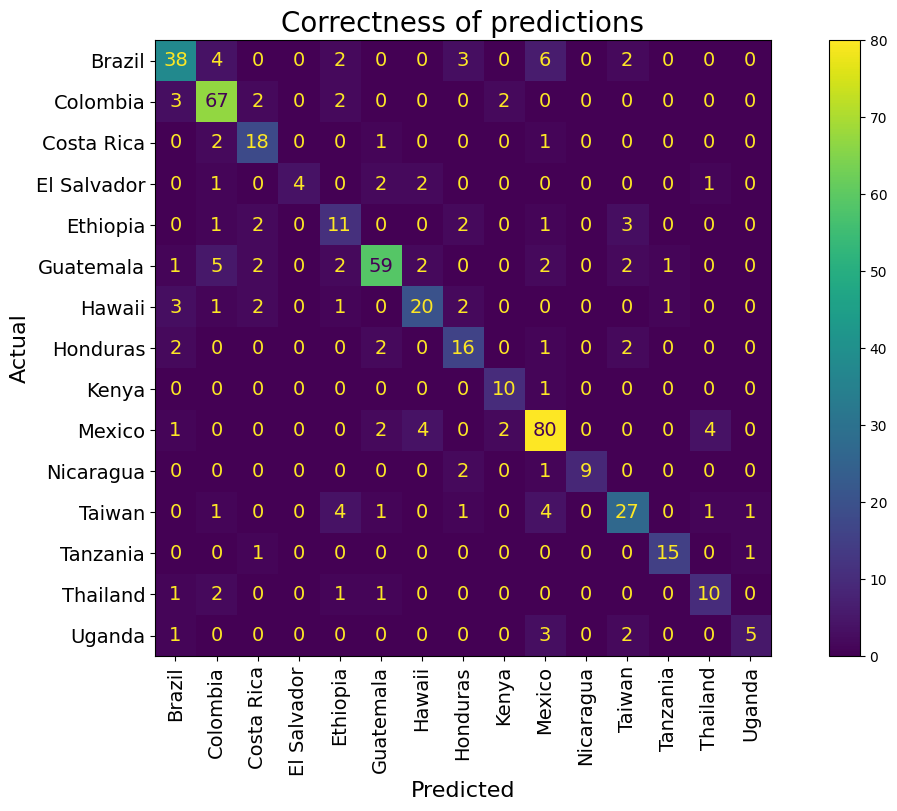

In [29]:
get_score_and_cm(imported_model, smote_X_train, smote_y_train)
get_score_and_cm(imported_model, X_test, y_test)

its working, wow

# Conclusion

Best model - GradientBoostClassifier